<a href="https://colab.research.google.com/github/Govin-Rai09/-library/blob/main/EDA_in_depth.ipynb" target="_parent"><img src="https://colab.research.google.com/assets/colab-badge.svg" alt="Open In Colab"/></a>

In [1]:
import pandas as pd
import numpy as np
import sklearn
import matplotlib.pyplot as plt
import seaborn as sns
from google.colab import drive

In [2]:
drive.mount('/content/drive')

Drive already mounted at /content/drive; to attempt to forcibly remount, call drive.mount("/content/drive", force_remount=True).


In [3]:
df=pd.read_csv('/content/drive/MyDrive/datasets/train.csv')

In [4]:
df.head()

,Id,MSSubClass,MSZoning,LotFrontage,LotArea,Street,Alley,LotShape,LandContour,Utilities,LotConfig,LandSlope,Neighborhood,Condition1,Condition2,BldgType,HouseStyle,OverallQual,OverallCond,YearBuilt,YearRemodAdd,RoofStyle,RoofMatl,Exterior1st,Exterior2nd,MasVnrType,MasVnrArea,ExterQual,ExterCond,Foundation,BsmtQual,BsmtCond,BsmtExposure,BsmtFinType1,BsmtFinSF1,BsmtFinType2,BsmtFinSF2,BsmtUnfSF,TotalBsmtSF,Heating,...,CentralAir,Electrical,1stFlrSF,2ndFlrSF,LowQualFinSF,GrLivArea,BsmtFullBath,BsmtHalfBath,FullBath,HalfBath,BedroomAbvGr,KitchenAbvGr,KitchenQual,TotRmsAbvGrd,Functional,Fireplaces,FireplaceQu,GarageType,GarageYrBlt,GarageFinish,GarageCars,GarageArea,GarageQual,GarageCond,PavedDrive,WoodDeckSF,OpenPorchSF,EnclosedPorch,3SsnPorch,ScreenPorch,PoolArea,PoolQC,Fence,MiscFeature,MiscVal,MoSold,YrSold,SaleType,SaleCondition,SalePrice
0,1,60,RL,65.0,8450,Pave,NaN,Reg,Lvl,AllPub,Inside,Gtl,CollgCr,Norm,Norm,1Fam,2Story,7,5,2003,2003,Gable,CompShg,VinylSd,VinylSd,BrkFace,196.0,Gd,TA,PConc,Gd,TA,No,GLQ,706,Unf,0,150,856,GasA,...,Y,SBrkr,856,854,0,1710,1,0,2,1,3,1,Gd,8,Typ,0,NaN,Attchd,2003.0,RFn,2,548,TA,TA,Y,0,61,0,0,0,0,NaN,NaN,NaN,0,2,2008,WD,Normal,208500
1,2,20,RL,80.0,9600,Pave,NaN,Reg,Lvl,AllPub,FR2,Gtl,Veenker,Feedr,Norm,1Fam,1Story,6,8,1976,1976,Gable,CompShg,MetalSd,MetalSd,None,0.0,TA,TA,CBlock,Gd,TA,Gd,ALQ,978,Unf,0,284,1262,GasA,...,Y,SBrkr,1262,0,0,1262,0,1,2,0,3,1,TA,6,Typ,1,TA,Attchd,1976.0,RFn,2,460,TA,TA,Y,298,0,0,0,0,0,NaN,NaN,NaN,0,5,2007,WD,Normal,181500
2,3,60,RL,68.0,11250,Pave,NaN,IR1,Lvl,AllPub,Inside,Gtl,CollgCr,Norm,Norm,1Fam,2Story,7,5,2001,2002,Gable,CompShg,VinylSd,VinylSd,BrkFace,162.0,Gd,TA,PConc,Gd,TA,Mn,GLQ,486,Unf,0,434,920,GasA,...,Y,SBrkr,920,866,0,1786,1,0,2,1,3,1,Gd,6,Typ,1,TA,Attchd,2001.0,RFn,2,608,TA,TA,Y,0,42,0,0,0,0,NaN,NaN,NaN,0,9,2008,WD,Normal,223500
3,4,70,RL,60.0,9550,Pave,NaN,IR1,Lvl,AllPub,Corner,Gtl,Crawfor,Norm,Norm,1Fam,2Story,7,5,1915,1970,Gable,CompShg,Wd Sdng,Wd Shng,None,0.0,TA,TA,BrkTil,TA,Gd,No,ALQ,216,Unf,0,540,756,GasA,...,Y,SBrkr,961,756,0,1717,1,0,1,0,3,1,Gd,7,Typ,1,Gd,Detchd,1998.0,Unf,3,642,TA,TA,Y,0,35,272,0,0,0,NaN,NaN,NaN,0,2,2006,WD,Abnorml,140000
4,5,60,RL,84.0,14260,Pave,NaN,IR1,Lvl,AllPub,FR2,Gtl,NoRidge,Norm,Norm,1Fam,2Story,8,5,2000,2000,Gable,CompShg,VinylSd,VinylSd,BrkFace,350.0,Gd,TA,PConc,Gd,TA,Av,GLQ,655,Unf,0,490,1145,GasA,...,Y,SBrkr,1145,1053,0,2198,1,0,2,1,4,1,Gd,9,Typ,1,TA,Attchd,2000.0,RFn,3,836,TA,TA,Y,192,84,0,0,0,0,NaN,NaN,NaN,0,12,2008,WD,Normal,250000


In [5]:
df.isnull().values.any()

True

In [6]:
cat_val=[feature for feature in df.columns if df[feature].dtypes=='O']
for feature in cat_val:
  print('{}: {} are categories'.format(feature,len(df[feature].unique())))

MSZoning: 5 are categories
Street: 2 are categories
Alley: 3 are categories
LotShape: 4 are categories
LandContour: 4 are categories
Utilities: 2 are categories
LotConfig: 5 are categories
LandSlope: 3 are categories
Neighborhood: 25 are categories
Condition1: 9 are categories
Condition2: 8 are categories
BldgType: 5 are categories
HouseStyle: 8 are categories
RoofStyle: 6 are categories
RoofMatl: 8 are categories
Exterior1st: 15 are categories
Exterior2nd: 16 are categories
MasVnrType: 5 are categories
ExterQual: 4 are categories
ExterCond: 5 are categories
Foundation: 6 are categories
BsmtQual: 5 are categories
BsmtCond: 5 are categories
BsmtExposure: 5 are categories
BsmtFinType1: 7 are categories
BsmtFinType2: 7 are categories
Heating: 6 are categories
HeatingQC: 5 are categories
CentralAir: 2 are categories
Electrical: 6 are categories
KitchenQual: 4 are categories
Functional: 7 are categories
FireplaceQu: 6 are categories
GarageType: 7 are categories
GarageFinish: 4 are categorie

In [7]:
df[cat_val].head()

,MSZoning,Street,Alley,LotShape,LandContour,Utilities,LotConfig,LandSlope,Neighborhood,Condition1,Condition2,BldgType,HouseStyle,RoofStyle,RoofMatl,Exterior1st,Exterior2nd,MasVnrType,ExterQual,ExterCond,Foundation,BsmtQual,BsmtCond,BsmtExposure,BsmtFinType1,BsmtFinType2,Heating,HeatingQC,CentralAir,Electrical,KitchenQual,Functional,FireplaceQu,GarageType,GarageFinish,GarageQual,GarageCond,PavedDrive,PoolQC,Fence,MiscFeature,SaleType,SaleCondition
0,RL,Pave,NaN,Reg,Lvl,AllPub,Inside,Gtl,CollgCr,Norm,Norm,1Fam,2Story,Gable,CompShg,VinylSd,VinylSd,BrkFace,Gd,TA,PConc,Gd,TA,No,GLQ,Unf,GasA,Ex,Y,SBrkr,Gd,Typ,NaN,Attchd,RFn,TA,TA,Y,NaN,NaN,NaN,WD,Normal
1,RL,Pave,NaN,Reg,Lvl,AllPub,FR2,Gtl,Veenker,Feedr,Norm,1Fam,1Story,Gable,CompShg,MetalSd,MetalSd,None,TA,TA,CBlock,Gd,TA,Gd,ALQ,Unf,GasA,Ex,Y,SBrkr,TA,Typ,TA,Attchd,RFn,TA,TA,Y,NaN,NaN,NaN,WD,Normal
2,RL,Pave,NaN,IR1,Lvl,AllPub,Inside,Gtl,CollgCr,Norm,Norm,1Fam,2Story,Gable,CompShg,VinylSd,VinylSd,BrkFace,Gd,TA,PConc,Gd,TA,Mn,GLQ,Unf,GasA,Ex,Y,SBrkr,Gd,Typ,TA,Attchd,RFn,TA,TA,Y,NaN,NaN,NaN,WD,Normal
3,RL,Pave,NaN,IR1,Lvl,AllPub,Corner,Gtl,Crawfor,Norm,Norm,1Fam,2Story,Gable,CompShg,Wd Sdng,Wd Shng,None,TA,TA,BrkTil,TA,Gd,No,ALQ,Unf,GasA,Gd,Y,SBrkr,Gd,Typ,Gd,Detchd,Unf,TA,TA,Y,NaN,NaN,NaN,WD,Abnorml
4,RL,Pave,NaN,IR1,Lvl,AllPub,FR2,Gtl,NoRidge,Norm,Norm,1Fam,2Story,Gable,CompShg,VinylSd,VinylSd,BrkFace,Gd,TA,PConc,Gd,TA,Av,GLQ,Unf,GasA,Ex,Y,SBrkr,Gd,Typ,TA,Attchd,RFn,TA,TA,Y,NaN,NaN,NaN,WD,Normal


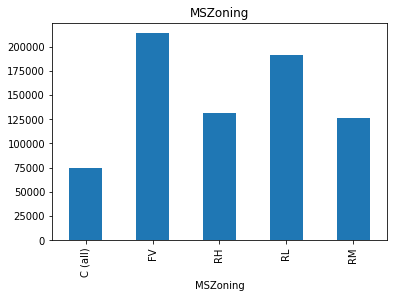

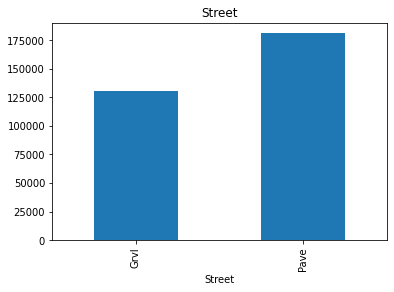

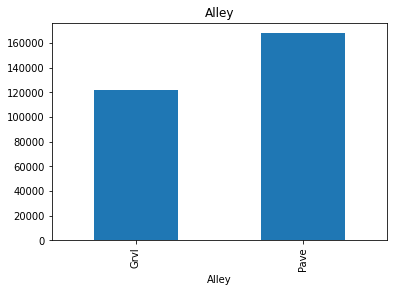

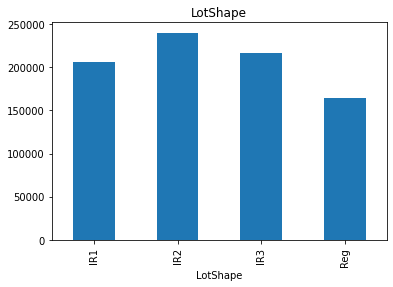

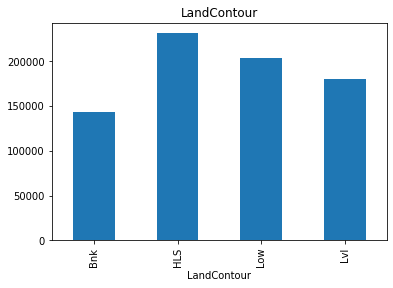

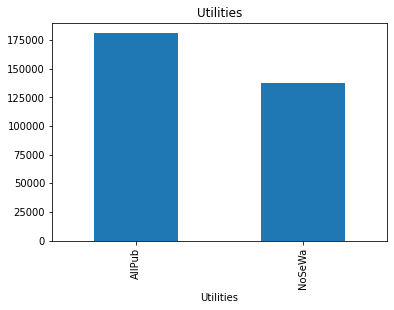

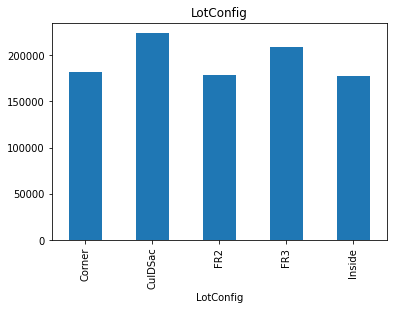

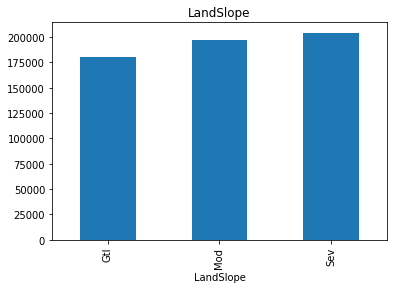

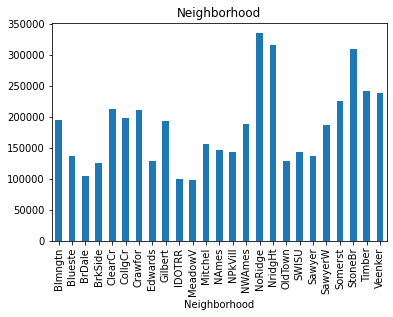

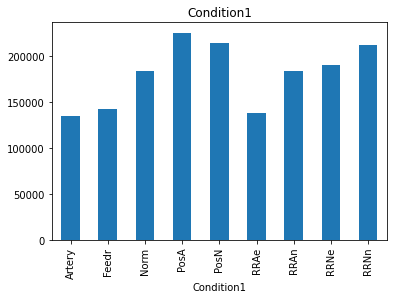

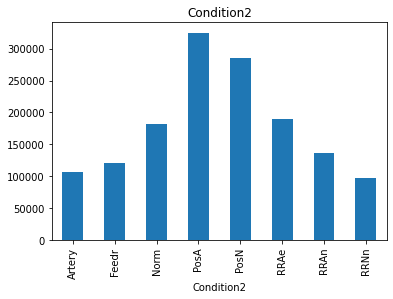

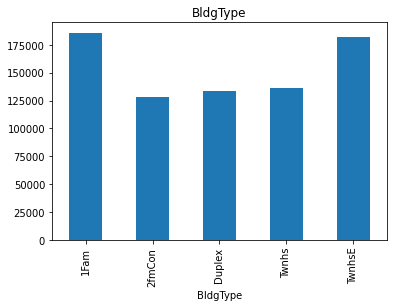

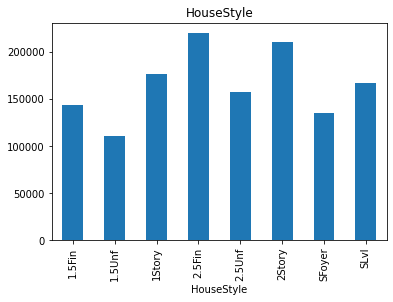

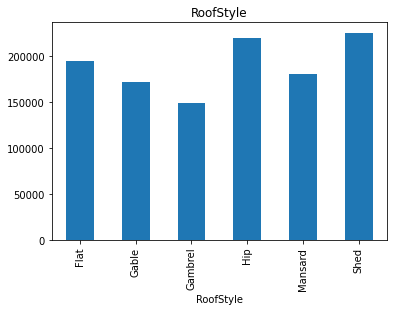

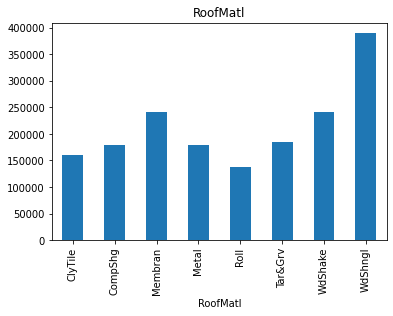

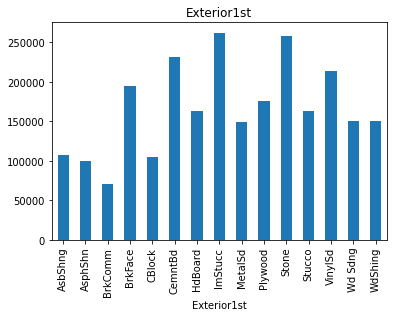

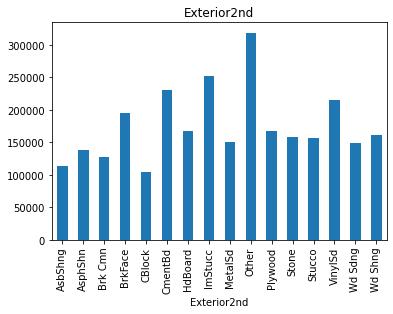

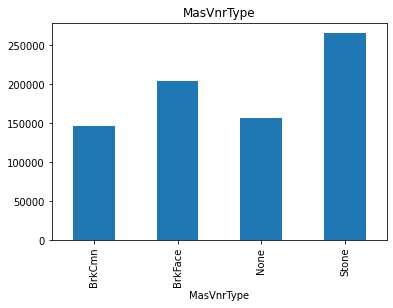

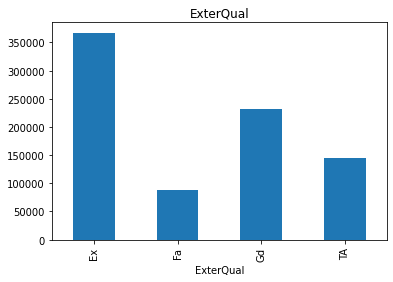

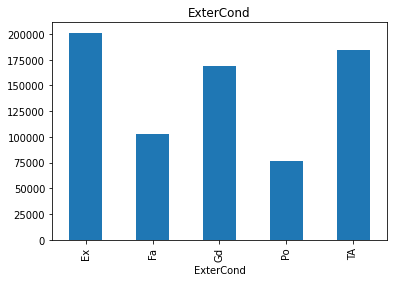

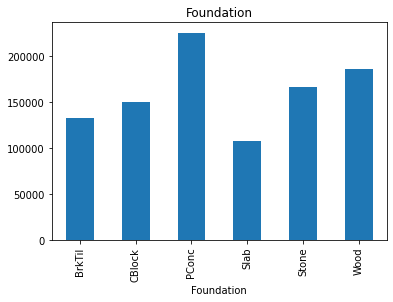

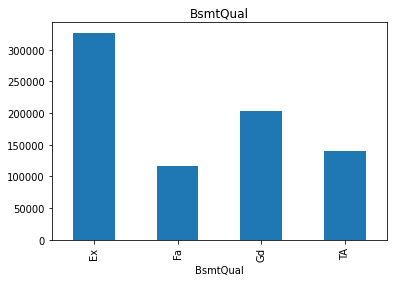

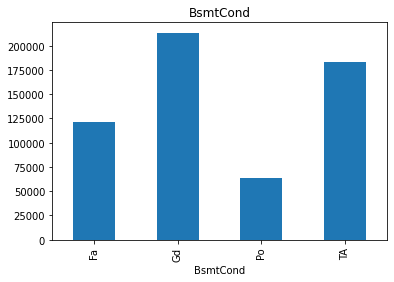

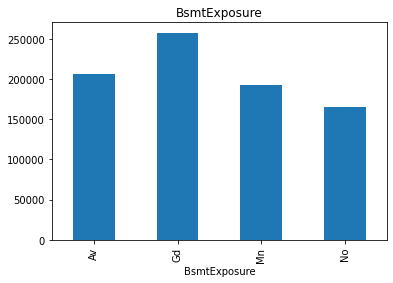

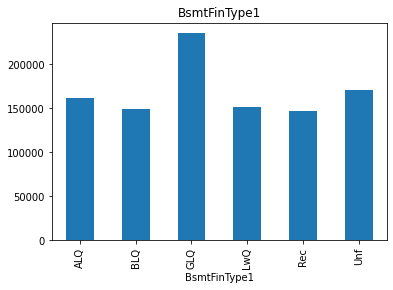

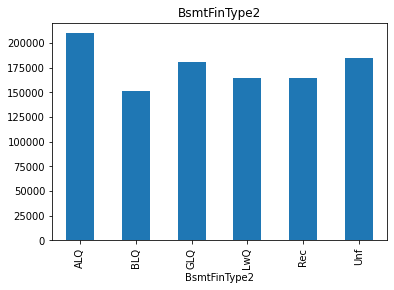

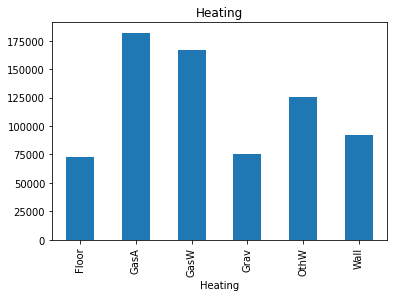

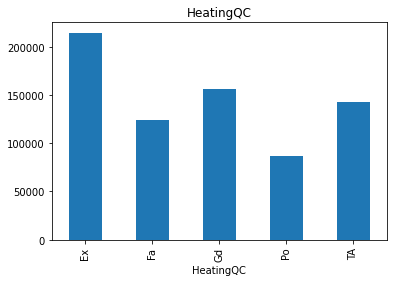

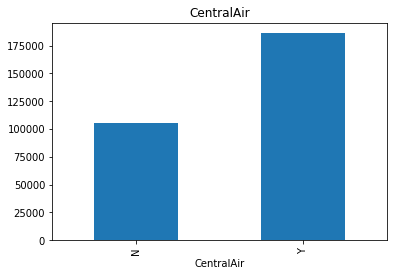

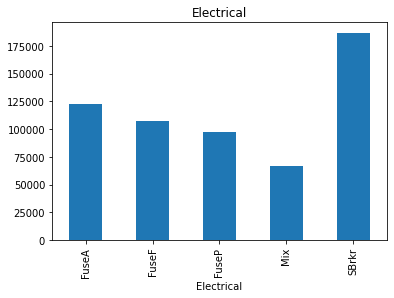

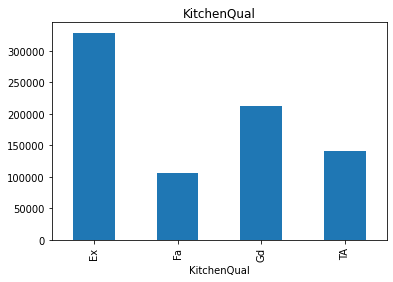

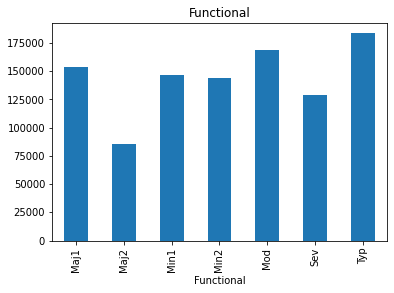

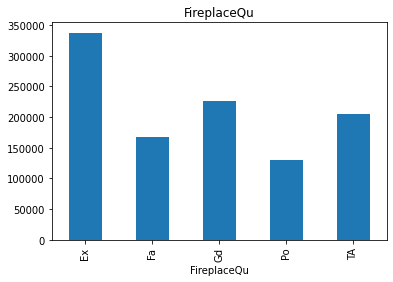

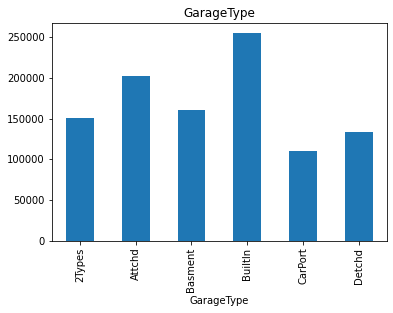

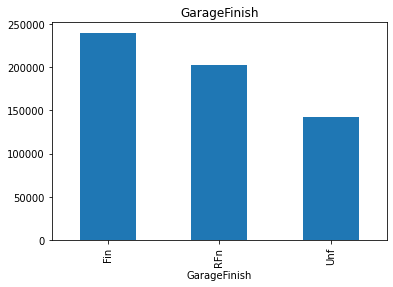

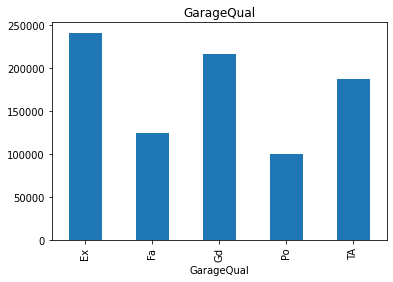

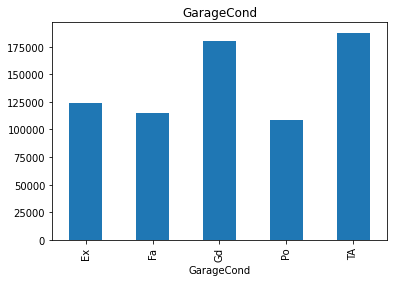

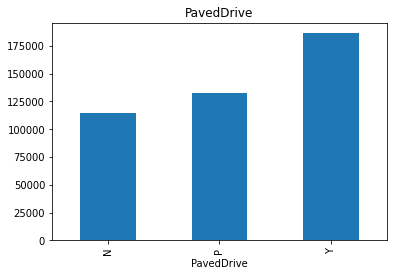

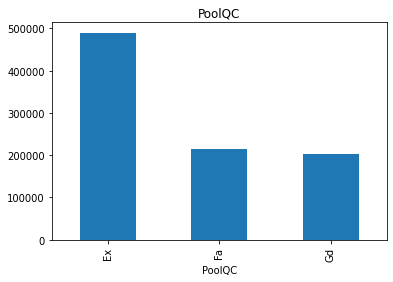

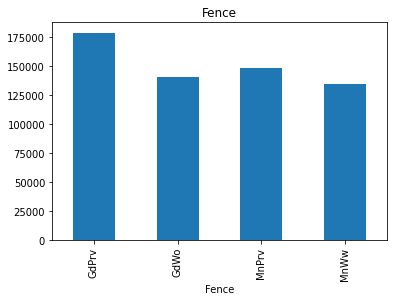

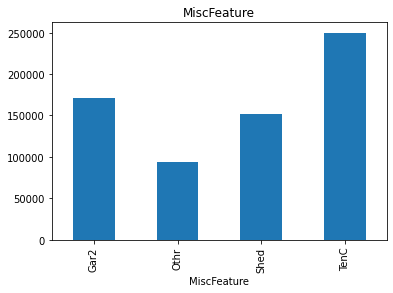

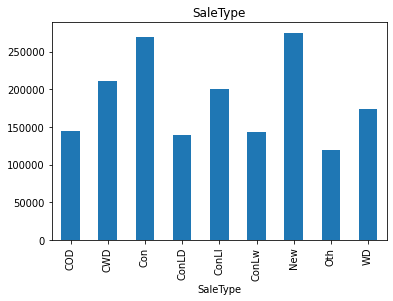

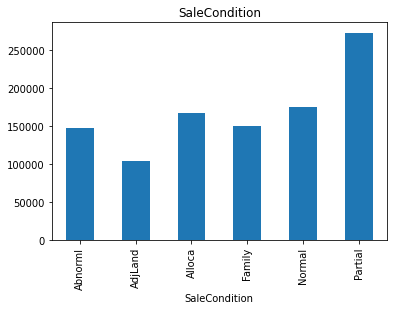

In [8]:
for feature in cat_val:
  data=df.copy()
  data.groupby(feature)['SalePrice'].mean().plot(kind='bar')
  plt.title(feature)
  plt.show()


In [9]:
val_na=[feature for feature in df.columns if df[feature].isnull().sum()>1]
for feature in val_na:
  print(feature,np.round(df[feature].isnull().mean(),3),'% missing values')

LotFrontage 0.177 % missing values
Alley 0.938 % missing values
MasVnrType 0.005 % missing values
MasVnrArea 0.005 % missing values
BsmtQual 0.025 % missing values
BsmtCond 0.025 % missing values
BsmtExposure 0.026 % missing values
BsmtFinType1 0.025 % missing values
BsmtFinType2 0.026 % missing values
FireplaceQu 0.473 % missing values
GarageType 0.055 % missing values
GarageYrBlt 0.055 % missing values
GarageFinish 0.055 % missing values
GarageQual 0.055 % missing values
GarageCond 0.055 % missing values
PoolQC 0.995 % missing values
Fence 0.808 % missing values
MiscFeature 0.963 % missing values


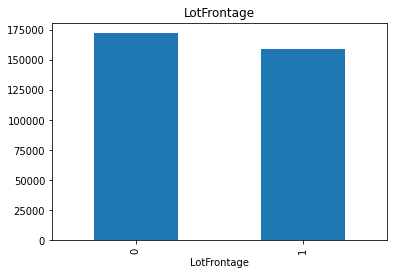

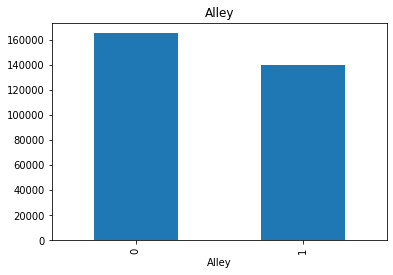

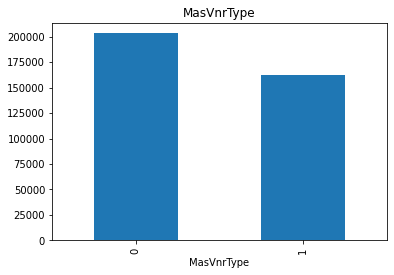

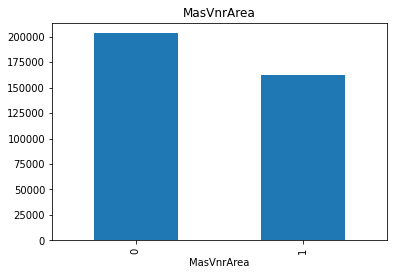

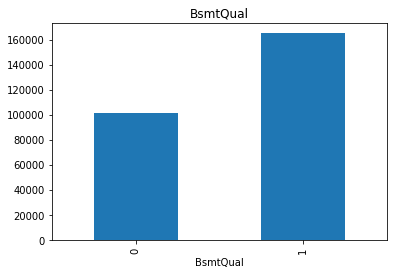

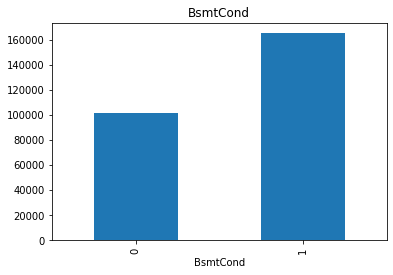

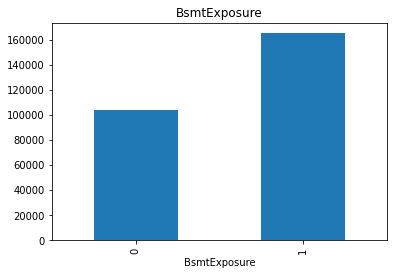

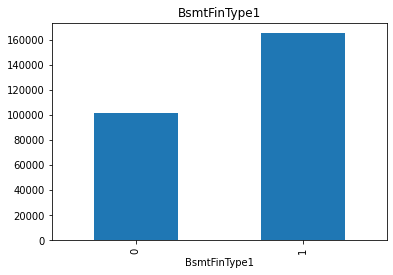

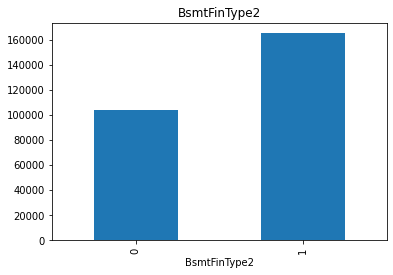

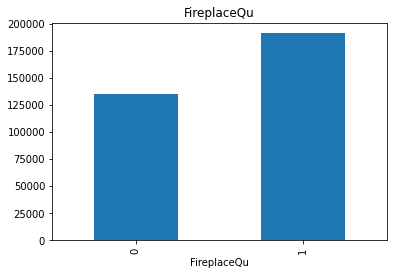

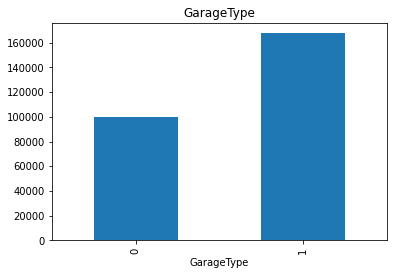

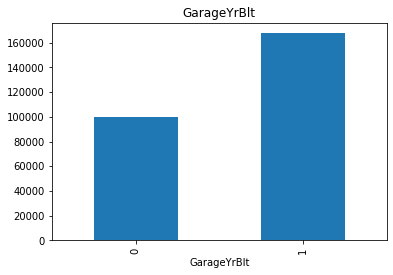

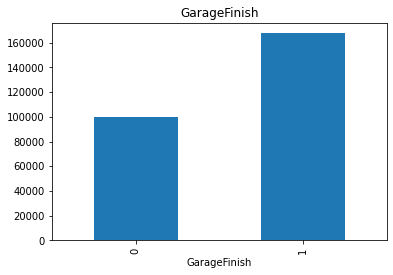

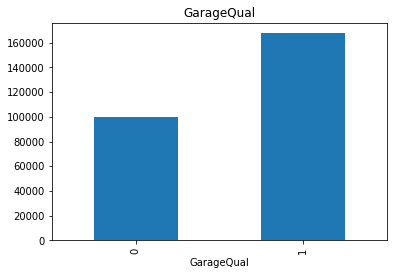

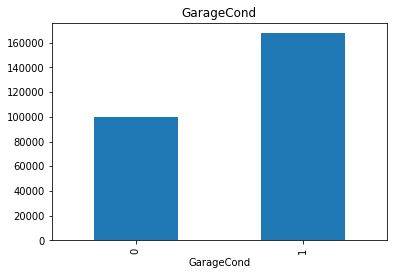

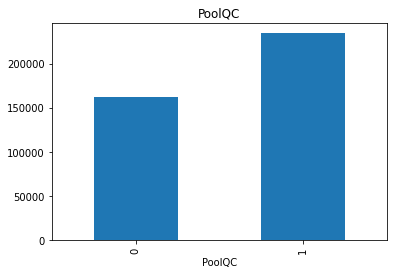

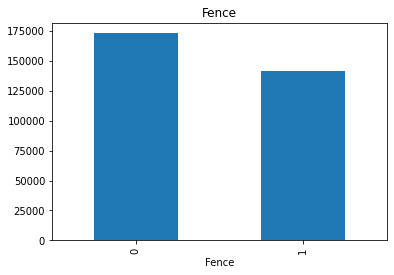

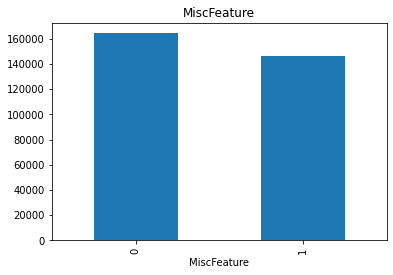

In [10]:
for feature in val_na:
  data=df.copy()
  data[feature]=np.where(data[feature].isnull(),0,1)
  data.groupby(feature)['SalePrice'].median().plot(kind='bar')
  plt.title(feature)
  plt.show()

In [11]:
num_val=[feature for feature in df.columns if df[feature].dtypes!='O']
print('Num of variables: ',len(num_val))

Num of variables:  38


In [12]:
df[num_val].head()

,Id,MSSubClass,LotFrontage,LotArea,OverallQual,OverallCond,YearBuilt,YearRemodAdd,MasVnrArea,BsmtFinSF1,BsmtFinSF2,BsmtUnfSF,TotalBsmtSF,1stFlrSF,2ndFlrSF,LowQualFinSF,GrLivArea,BsmtFullBath,BsmtHalfBath,FullBath,HalfBath,BedroomAbvGr,KitchenAbvGr,TotRmsAbvGrd,Fireplaces,GarageYrBlt,GarageCars,GarageArea,WoodDeckSF,OpenPorchSF,EnclosedPorch,3SsnPorch,ScreenPorch,PoolArea,MiscVal,MoSold,YrSold,SalePrice
0,1,60,65.0,8450,7,5,2003,2003,196.0,706,0,150,856,856,854,0,1710,1,0,2,1,3,1,8,0,2003.0,2,548,0,61,0,0,0,0,0,2,2008,208500
1,2,20,80.0,9600,6,8,1976,1976,0.0,978,0,284,1262,1262,0,0,1262,0,1,2,0,3,1,6,1,1976.0,2,460,298,0,0,0,0,0,0,5,2007,181500
2,3,60,68.0,11250,7,5,2001,2002,162.0,486,0,434,920,920,866,0,1786,1,0,2,1,3,1,6,1,2001.0,2,608,0,42,0,0,0,0,0,9,2008,223500
3,4,70,60.0,9550,7,5,1915,1970,0.0,216,0,540,756,961,756,0,1717,1,0,1,0,3,1,7,1,1998.0,3,642,0,35,272,0,0,0,0,2,2006,140000
4,5,60,84.0,14260,8,5,2000,2000,350.0,655,0,490,1145,1145,1053,0,2198,1,0,2,1,4,1,9,1,2000.0,3,836,192,84,0,0,0,0,0,12,2008,250000


In [13]:
yr_tem=[feature for feature in num_val if 'Yr' in feature or 'Year' in feature]

In [14]:
yr_tem

['YearBuilt', 'YearRemodAdd', 'GarageYrBlt', 'YrSold']

In [15]:
for feature in yr_tem:
  print(feature,df[feature].unique())

YearBuilt [2003 1976 2001 1915 2000 1993 2004 1973 1931 1939 1965 2005 1962 2006
 1960 1929 1970 1967 1958 1930 2002 1968 2007 1951 1957 1927 1920 1966
 1959 1994 1954 1953 1955 1983 1975 1997 1934 1963 1981 1964 1999 1972
 1921 1945 1982 1998 1956 1948 1910 1995 1991 2009 1950 1961 1977 1985
 1979 1885 1919 1990 1969 1935 1988 1971 1952 1936 1923 1924 1984 1926
 1940 1941 1987 1986 2008 1908 1892 1916 1932 1918 1912 1947 1925 1900
 1980 1989 1992 1949 1880 1928 1978 1922 1996 2010 1946 1913 1937 1942
 1938 1974 1893 1914 1906 1890 1898 1904 1882 1875 1911 1917 1872 1905]
YearRemodAdd [2003 1976 2002 1970 2000 1995 2005 1973 1950 1965 2006 1962 2007 1960
 2001 1967 2004 2008 1997 1959 1990 1955 1983 1980 1966 1963 1987 1964
 1972 1996 1998 1989 1953 1956 1968 1981 1992 2009 1982 1961 1993 1999
 1985 1979 1977 1969 1958 1991 1971 1952 1975 2010 1984 1986 1994 1988
 1954 1957 1951 1978 1974]
GarageYrBlt [2003. 1976. 2001. 1998. 2000. 1993. 2004. 1973. 1931. 1939. 1965. 2005.
 1962. 2006.

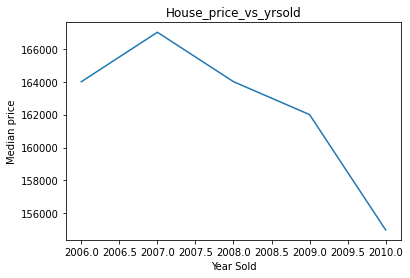

In [16]:
df.groupby('YrSold')['SalePrice'].median().plot()
plt.xlabel('Year Sold')
plt.ylabel('Median price')
plt.title('House_price_vs_yrsold')
plt.show()

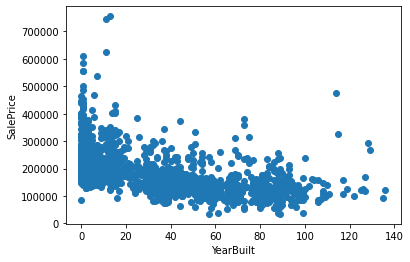

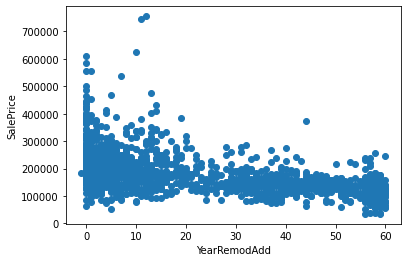

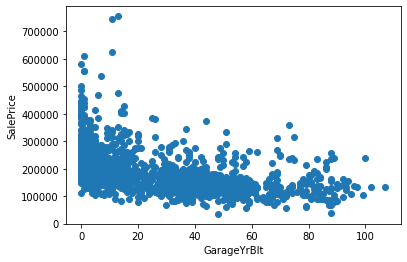

In [17]:
for feature in yr_tem:
  if feature!='YrSold':
    data=df.copy()
    data[feature]=data['YrSold']-data[feature]
    plt.scatter(data[feature],data['SalePrice'])
    plt.xlabel(feature)
    plt.ylabel('SalePrice')
    plt.show()

In [18]:
dis_feat=[feature for feature in num_val if len(df[feature].unique())<25 and feature not in yr_tem +['Id']]
print('Discrete Variable Count: {}'.format(len(dis_feat)))

Discrete Variable Count: 17


In [19]:
df[dis_feat].head()

,MSSubClass,OverallQual,OverallCond,LowQualFinSF,BsmtFullBath,BsmtHalfBath,FullBath,HalfBath,BedroomAbvGr,KitchenAbvGr,TotRmsAbvGrd,Fireplaces,GarageCars,3SsnPorch,PoolArea,MiscVal,MoSold
0,60,7,5,0,1,0,2,1,3,1,8,0,2,0,0,0,2
1,20,6,8,0,0,1,2,0,3,1,6,1,2,0,0,0,5
2,60,7,5,0,1,0,2,1,3,1,6,1,2,0,0,0,9
3,70,7,5,0,1,0,1,0,3,1,7,1,3,0,0,0,2
4,60,8,5,0,1,0,2,1,4,1,9,1,3,0,0,0,12


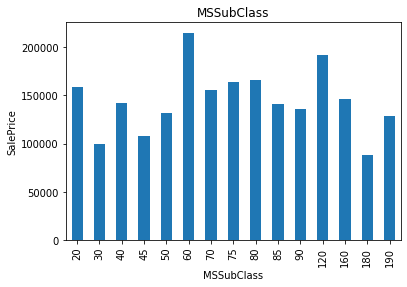

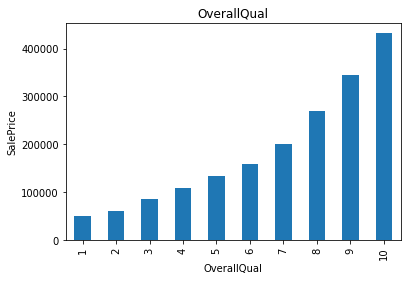

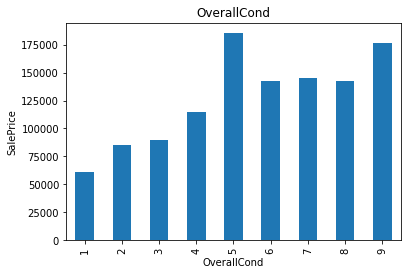

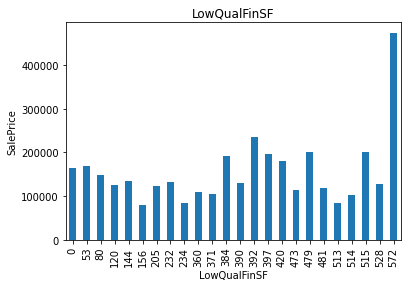

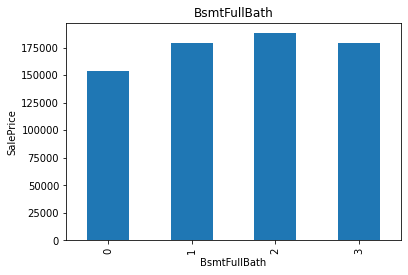

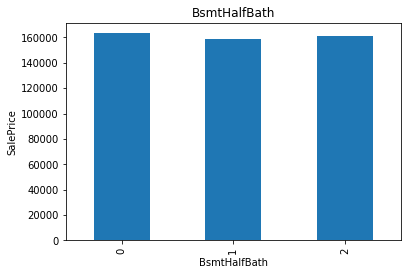

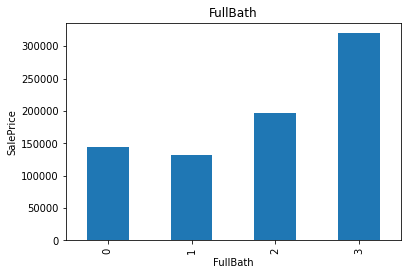

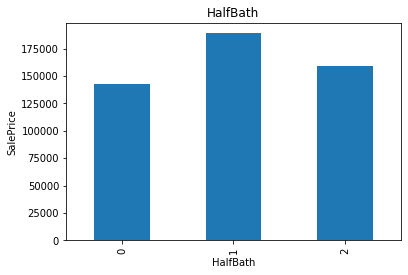

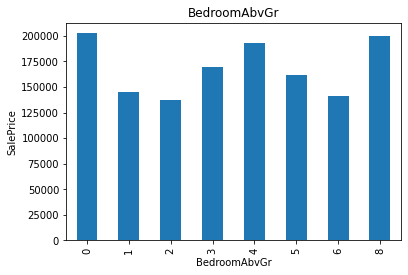

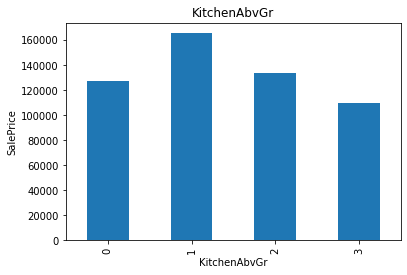

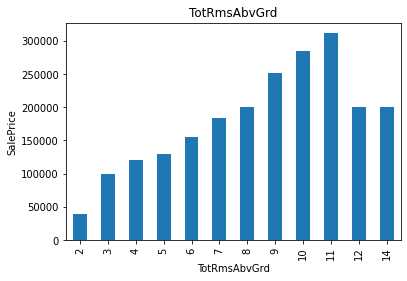

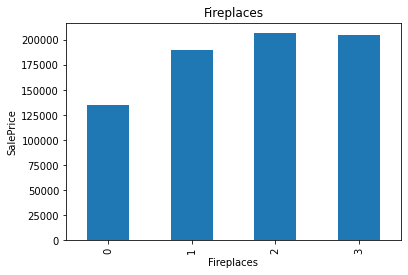

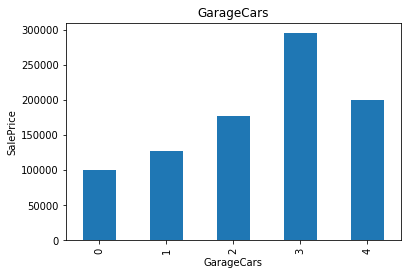

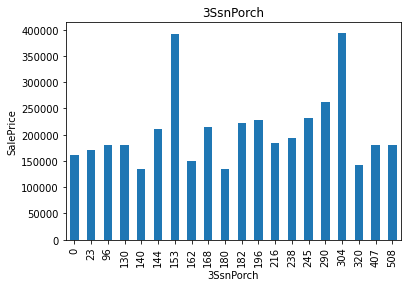

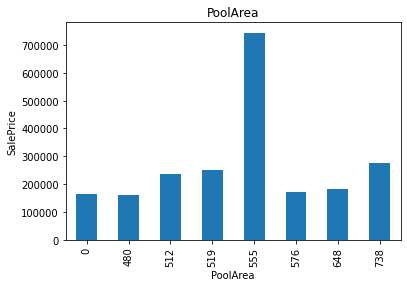

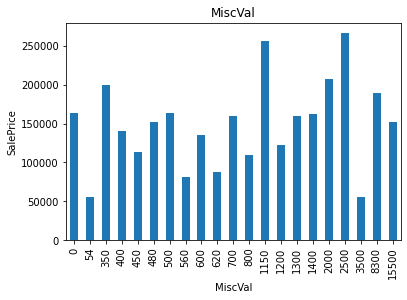

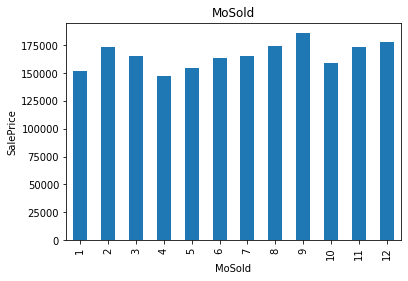

In [20]:
for feature in dis_feat:
  data=df.copy()
  data.groupby(feature)['SalePrice'].median().plot(kind='bar')
  plt.title(feature)
  plt.xlabel(feature)
  plt.ylabel('SalePrice')
  plt.show()

In [21]:
con_val=[feature for feature in num_val if feature not in dis_feat+yr_tem+['Id']]
print('Continuous feature {}'.format(len(con_val)))

Continuous feature 16


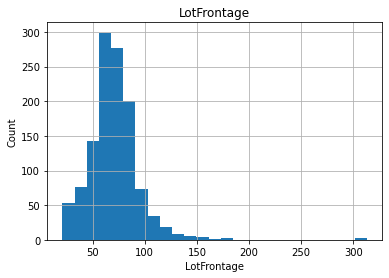

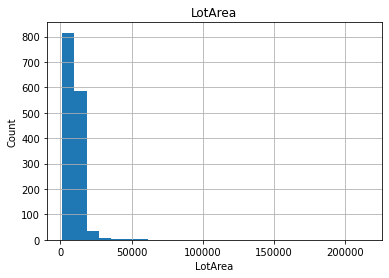

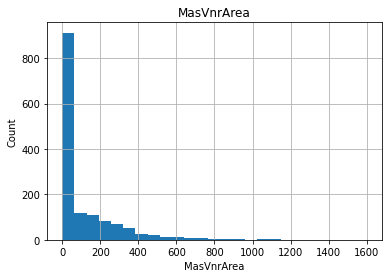

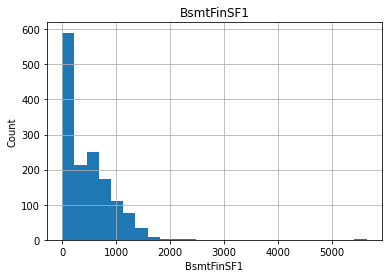

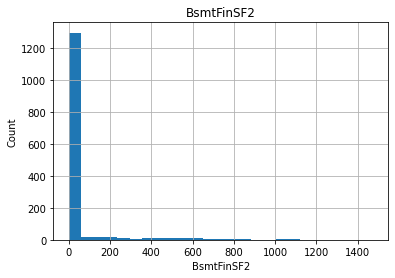

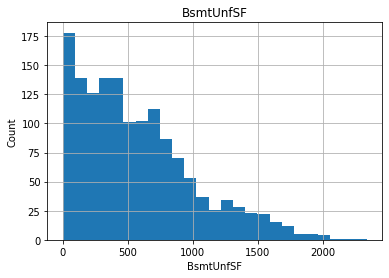

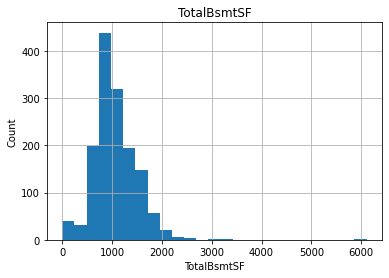

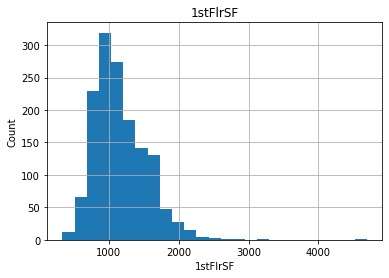

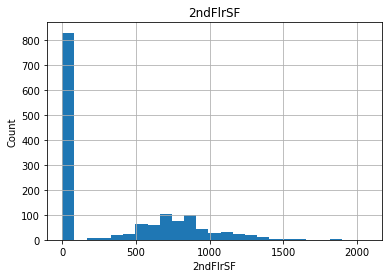

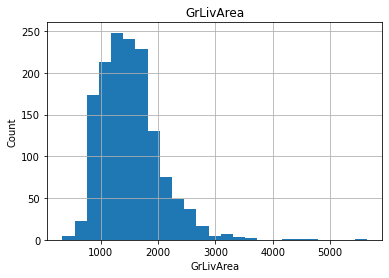

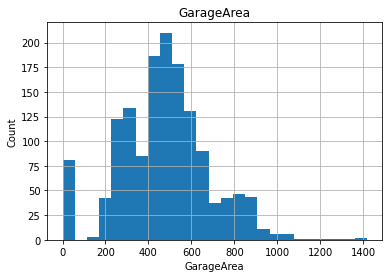

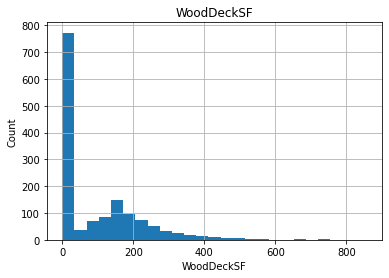

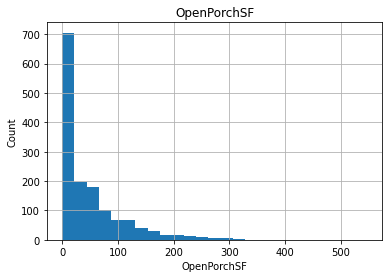

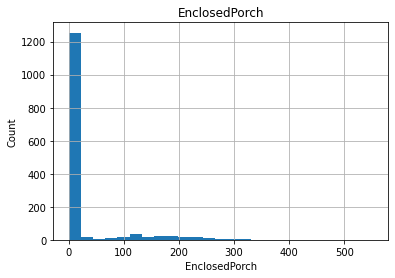

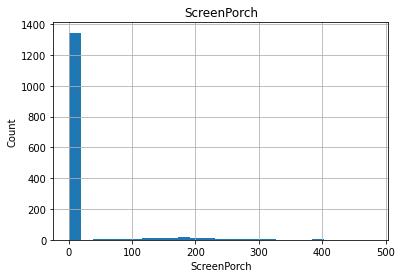

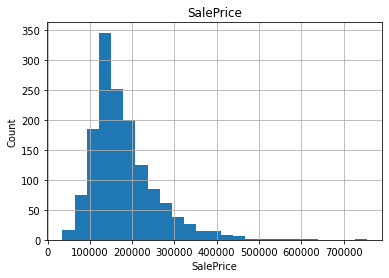

In [22]:
for feature in con_val:
  data=df.copy()
  data[feature].hist(bins=25)
  plt.xlabel(feature)
  plt.ylabel('Count')
  plt.title(feature)
  plt.show()

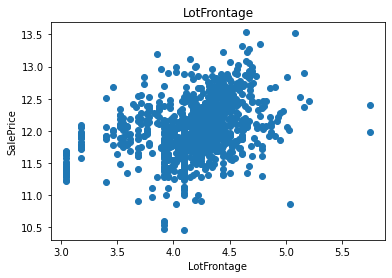

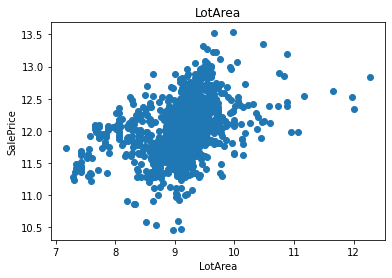

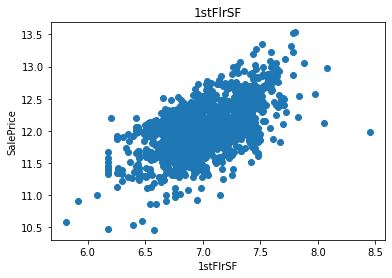

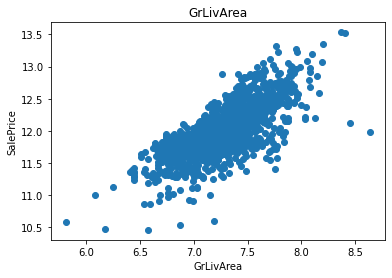

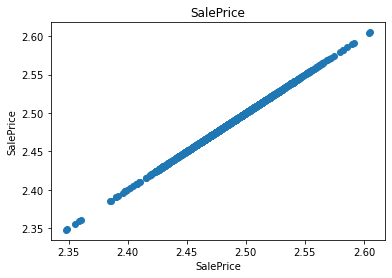

In [23]:
for feature in con_val:
  data=df.copy()
  if 0 in data[feature].unique():
    pass
  else:
    data[feature]=np.log(data[feature])
    data['SalePrice']=np.log(data['SalePrice'])
    plt.scatter(data[feature],data['SalePrice'])
    plt.xlabel(feature)
    plt.ylabel('SalePrice')
    plt.title(feature)
    plt.show()

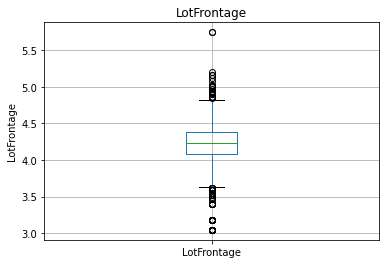

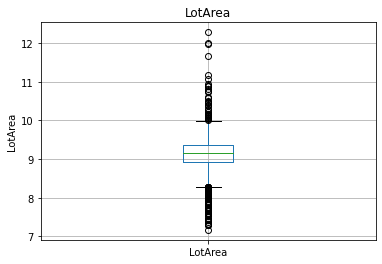

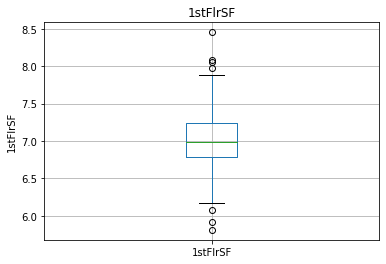

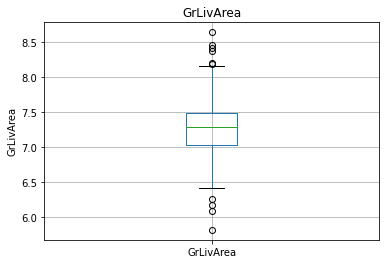

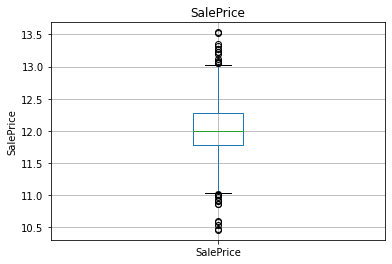

In [24]:
for feature in con_val:
  data=df.copy()
  if 0 in data[feature].unique():
    pass
  else:
    data[feature]=np.log(data[feature])
    data.boxplot(column=feature)
    plt.ylabel(feature)
    plt.title(feature)
    plt.show()

In [25]:
feat_nan_cat=[feature for feature in df.columns if df[feature].isnull().sum()>1 and df[feature].dtypes=='O']


In [26]:
for feature in feat_nan_cat:
  print('{}: {} % missing values'.format(feature,np.round(df[feature].isnull().mean(),3)))

Alley: 0.938 % missing values
MasVnrType: 0.005 % missing values
BsmtQual: 0.025 % missing values
BsmtCond: 0.025 % missing values
BsmtExposure: 0.026 % missing values
BsmtFinType1: 0.025 % missing values
BsmtFinType2: 0.026 % missing values
FireplaceQu: 0.473 % missing values
GarageType: 0.055 % missing values
GarageFinish: 0.055 % missing values
GarageQual: 0.055 % missing values
GarageCond: 0.055 % missing values
PoolQC: 0.995 % missing values
Fence: 0.808 % missing values
MiscFeature: 0.963 % missing values


In [27]:
def rem_nan(df,feat_nan_cat):
  data=df.copy()
  data[feat_nan_cat]=data[feat_nan_cat].fillna('Missing')
  return data


In [28]:
df=rem_nan(df,feat_nan_cat)

In [29]:
df[feat_nan_cat].isnull().sum()

Alley           0
MasVnrType      0
BsmtQual        0
BsmtCond        0
BsmtExposure    0
BsmtFinType1    0
BsmtFinType2    0
FireplaceQu     0
GarageType      0
GarageFinish    0
GarageQual      0
GarageCond      0
PoolQC          0
Fence           0
MiscFeature     0
dtype: int64

In [30]:
df.head()

,Id,MSSubClass,MSZoning,LotFrontage,LotArea,Street,Alley,LotShape,LandContour,Utilities,LotConfig,LandSlope,Neighborhood,Condition1,Condition2,BldgType,HouseStyle,OverallQual,OverallCond,YearBuilt,YearRemodAdd,RoofStyle,RoofMatl,Exterior1st,Exterior2nd,MasVnrType,MasVnrArea,ExterQual,ExterCond,Foundation,BsmtQual,BsmtCond,BsmtExposure,BsmtFinType1,BsmtFinSF1,BsmtFinType2,BsmtFinSF2,BsmtUnfSF,TotalBsmtSF,Heating,...,CentralAir,Electrical,1stFlrSF,2ndFlrSF,LowQualFinSF,GrLivArea,BsmtFullBath,BsmtHalfBath,FullBath,HalfBath,BedroomAbvGr,KitchenAbvGr,KitchenQual,TotRmsAbvGrd,Functional,Fireplaces,FireplaceQu,GarageType,GarageYrBlt,GarageFinish,GarageCars,GarageArea,GarageQual,GarageCond,PavedDrive,WoodDeckSF,OpenPorchSF,EnclosedPorch,3SsnPorch,ScreenPorch,PoolArea,PoolQC,Fence,MiscFeature,MiscVal,MoSold,YrSold,SaleType,SaleCondition,SalePrice
0,1,60,RL,65.0,8450,Pave,Missing,Reg,Lvl,AllPub,Inside,Gtl,CollgCr,Norm,Norm,1Fam,2Story,7,5,2003,2003,Gable,CompShg,VinylSd,VinylSd,BrkFace,196.0,Gd,TA,PConc,Gd,TA,No,GLQ,706,Unf,0,150,856,GasA,...,Y,SBrkr,856,854,0,1710,1,0,2,1,3,1,Gd,8,Typ,0,Missing,Attchd,2003.0,RFn,2,548,TA,TA,Y,0,61,0,0,0,0,Missing,Missing,Missing,0,2,2008,WD,Normal,208500
1,2,20,RL,80.0,9600,Pave,Missing,Reg,Lvl,AllPub,FR2,Gtl,Veenker,Feedr,Norm,1Fam,1Story,6,8,1976,1976,Gable,CompShg,MetalSd,MetalSd,None,0.0,TA,TA,CBlock,Gd,TA,Gd,ALQ,978,Unf,0,284,1262,GasA,...,Y,SBrkr,1262,0,0,1262,0,1,2,0,3,1,TA,6,Typ,1,TA,Attchd,1976.0,RFn,2,460,TA,TA,Y,298,0,0,0,0,0,Missing,Missing,Missing,0,5,2007,WD,Normal,181500
2,3,60,RL,68.0,11250,Pave,Missing,IR1,Lvl,AllPub,Inside,Gtl,CollgCr,Norm,Norm,1Fam,2Story,7,5,2001,2002,Gable,CompShg,VinylSd,VinylSd,BrkFace,162.0,Gd,TA,PConc,Gd,TA,Mn,GLQ,486,Unf,0,434,920,GasA,...,Y,SBrkr,920,866,0,1786,1,0,2,1,3,1,Gd,6,Typ,1,TA,Attchd,2001.0,RFn,2,608,TA,TA,Y,0,42,0,0,0,0,Missing,Missing,Missing,0,9,2008,WD,Normal,223500
3,4,70,RL,60.0,9550,Pave,Missing,IR1,Lvl,AllPub,Corner,Gtl,Crawfor,Norm,Norm,1Fam,2Story,7,5,1915,1970,Gable,CompShg,Wd Sdng,Wd Shng,None,0.0,TA,TA,BrkTil,TA,Gd,No,ALQ,216,Unf,0,540,756,GasA,...,Y,SBrkr,961,756,0,1717,1,0,1,0,3,1,Gd,7,Typ,1,Gd,Detchd,1998.0,Unf,3,642,TA,TA,Y,0,35,272,0,0,0,Missing,Missing,Missing,0,2,2006,WD,Abnorml,140000
4,5,60,RL,84.0,14260,Pave,Missing,IR1,Lvl,AllPub,FR2,Gtl,NoRidge,Norm,Norm,1Fam,2Story,8,5,2000,2000,Gable,CompShg,VinylSd,VinylSd,BrkFace,350.0,Gd,TA,PConc,Gd,TA,Av,GLQ,655,Unf,0,490,1145,GasA,...,Y,SBrkr,1145,1053,0,2198,1,0,2,1,4,1,Gd,9,Typ,1,TA,Attchd,2000.0,RFn,3,836,TA,TA,Y,192,84,0,0,0,0,Missing,Missing,Missing,0,12,2008,WD,Normal,250000


In [31]:
num_with_nan=[feature for feature in df.columns if df[feature].isnull().sum()>1 and df[feature].dtypes!='O']
for feature in num_with_nan:
  print('{}:{} %missing values'.format(feature,np.round(df[feature].isnull().mean(),3)))

LotFrontage:0.177 %missing values
MasVnrArea:0.005 %missing values
GarageYrBlt:0.055 %missing values


In [32]:
for feature in num_with_nan:
  
  median=df[feature].median()
  df[feature].fillna(median,inplace=True)

In [33]:
df[num_with_nan].isnull().values.any()

False

In [34]:
df[num_with_nan].isnull().sum()

LotFrontage    0
MasVnrArea     0
GarageYrBlt    0
dtype: int64

In [35]:
yr_tem

['YearBuilt', 'YearRemodAdd', 'GarageYrBlt', 'YrSold']

In [36]:
for feature in ['YearBuilt', 'YearRemodAdd', 'GarageYrBlt']:
  df[feature]=df['YrSold']-df[feature]

In [37]:
df[ ['YearBuilt', 'YearRemodAdd', 'GarageYrBlt']].head()

,YearBuilt,YearRemodAdd,GarageYrBlt
0,5,5,5.0
1,31,31,31.0
2,7,6,7.0
3,91,36,8.0
4,8,8,8.0


In [38]:
# performing log normal distribution

In [39]:
num_feat=['LotFrontage', 'LotArea', '1stFlrSF', 'GrLivArea', 'SalePrice']
for feature in num_feat:
  df[feature]=np.log(df[feature])

In [40]:
for feature in cat_val:
  temp=df.groupby(feature)['SalePrice'].count()/len(df)
  temp_df=temp[temp>0.01].index
  df[feature]=np.where(df[feature].isin(temp_df),df[feature],'Rare_var')

In [41]:
for feature in cat_val:
  label_ord=df.groupby([feature])['SalePrice'].mean().sort_values().index
  label_ord={k:i for i,k in enumerate(label_ord,0)}
  df[feature]=df[feature].map(label_ord)

In [42]:
df.head()

,Id,MSSubClass,MSZoning,LotFrontage,LotArea,Street,Alley,LotShape,LandContour,Utilities,LotConfig,LandSlope,Neighborhood,Condition1,Condition2,BldgType,HouseStyle,OverallQual,OverallCond,YearBuilt,YearRemodAdd,RoofStyle,RoofMatl,Exterior1st,Exterior2nd,MasVnrType,MasVnrArea,ExterQual,ExterCond,Foundation,BsmtQual,BsmtCond,BsmtExposure,BsmtFinType1,BsmtFinSF1,BsmtFinType2,BsmtFinSF2,BsmtUnfSF,TotalBsmtSF,Heating,...,CentralAir,Electrical,1stFlrSF,2ndFlrSF,LowQualFinSF,GrLivArea,BsmtFullBath,BsmtHalfBath,FullBath,HalfBath,BedroomAbvGr,KitchenAbvGr,KitchenQual,TotRmsAbvGrd,Functional,Fireplaces,FireplaceQu,GarageType,GarageYrBlt,GarageFinish,GarageCars,GarageArea,GarageQual,GarageCond,PavedDrive,WoodDeckSF,OpenPorchSF,EnclosedPorch,3SsnPorch,ScreenPorch,PoolArea,PoolQC,Fence,MiscFeature,MiscVal,MoSold,YrSold,SaleType,SaleCondition,SalePrice
0,1,60,3,4.174387,9.041922,1,2,0,1,1,0,0,14,2,1,3,5,7,5,5,5,0,0,10,10,2,196.0,2,3,4,3,3,1,6,706,5,0,150,856,2,...,1,3,6.752270,854,0,7.444249,1,0,2,1,3,1,2,8,4,0,1,4,5.0,2,2,548,2,3,2,0,61,0,0,0,0,0,4,2,0,2,2008,2,3,12.247694
1,2,20,3,4.382027,9.169518,1,2,0,1,1,2,0,11,1,1,3,3,6,8,31,31,0,0,4,3,1,0.0,1,3,2,3,3,4,4,978,5,0,284,1262,2,...,1,3,7.140453,0,0,7.140453,0,1,2,0,3,1,1,6,4,1,3,4,31.0,2,2,460,2,3,2,298,0,0,0,0,0,0,4,2,0,5,2007,2,3,12.109011
2,3,60,3,4.219508,9.328123,1,2,1,1,1,0,0,14,2,1,3,5,7,5,7,6,0,0,10,10,2,162.0,2,3,4,3,3,2,6,486,5,0,434,920,2,...,1,3,6.824374,866,0,7.487734,1,0,2,1,3,1,2,6,4,1,3,4,7.0,2,2,608,2,3,2,0,42,0,0,0,0,0,4,2,0,9,2008,2,3,12.317167
3,4,70,3,4.094345,9.164296,1,2,1,1,1,1,0,16,2,1,3,5,7,5,91,36,0,0,2,4,1,0.0,1,3,1,2,4,1,4,216,5,0,540,756,2,...,1,3,6.867974,756,0,7.448334,1,0,1,0,3,1,2,7,4,1,4,2,8.0,1,3,642,2,3,2,0,35,272,0,0,0,0,4,2,0,2,2006,2,0,11.849398
4,5,60,3,4.430817,9.565214,1,2,1,1,1,2,0,22,2,1,3,5,8,5,8,8,0,0,10,10,2,350.0,2,3,4,3,3,3,6,655,5,0,490,1145,2,...,1,3,7.043160,1053,0,7.695303,1,0,2,1,4,1,2,9,4,1,3,4,8.0,2,3,836,2,3,2,192,84,0,0,0,0,0,4,2,0,12,2008,2,3,12.429216


In [43]:
scaling_feat=[feature for feature in df.columns if feature not in ['Id','SalePrice']]
len(scaling_feat)

79

In [44]:
from sklearn.preprocessing import MinMaxScaler
scaler=MinMaxScaler()

In [45]:
scaler.fit_transform(df[scaling_feat])

array([[0.23529412, 0.75      , 0.41820812, ..., 0.5       , 0.66666667,
        0.75      ],
       [0.        , 0.75      , 0.49506375, ..., 0.25      , 0.66666667,
        0.75      ],
       [0.23529412, 0.75      , 0.434909  , ..., 0.5       , 0.66666667,
        0.75      ],
       ...,
       [0.29411765, 0.75      , 0.42385922, ..., 1.        , 0.66666667,
        0.75      ],
       [0.        , 0.75      , 0.434909  , ..., 1.        , 0.66666667,
        0.75      ],
       [0.        , 0.75      , 0.47117546, ..., 0.5       , 0.66666667,
        0.75      ]])

In [46]:
data=pd.concat([df[['Id','SalePrice']].reset_index(drop=True),pd.DataFrame(scaler.transform(df[scaling_feat]),columns=scaling_feat)],axis=1)

In [47]:
data.head()

,Id,SalePrice,MSSubClass,MSZoning,LotFrontage,LotArea,Street,Alley,LotShape,LandContour,Utilities,LotConfig,LandSlope,Neighborhood,Condition1,Condition2,BldgType,HouseStyle,OverallQual,OverallCond,YearBuilt,YearRemodAdd,RoofStyle,RoofMatl,Exterior1st,Exterior2nd,MasVnrType,MasVnrArea,ExterQual,ExterCond,Foundation,BsmtQual,BsmtCond,BsmtExposure,BsmtFinType1,BsmtFinSF1,BsmtFinType2,BsmtFinSF2,BsmtUnfSF,TotalBsmtSF,...,HeatingQC,CentralAir,Electrical,1stFlrSF,2ndFlrSF,LowQualFinSF,GrLivArea,BsmtFullBath,BsmtHalfBath,FullBath,HalfBath,BedroomAbvGr,KitchenAbvGr,KitchenQual,TotRmsAbvGrd,Functional,Fireplaces,FireplaceQu,GarageType,GarageYrBlt,GarageFinish,GarageCars,GarageArea,GarageQual,GarageCond,PavedDrive,WoodDeckSF,OpenPorchSF,EnclosedPorch,3SsnPorch,ScreenPorch,PoolArea,PoolQC,Fence,MiscFeature,MiscVal,MoSold,YrSold,SaleType,SaleCondition
0,1,12.247694,0.235294,0.75,0.418208,0.366344,1.0,1.0,0.000000,0.333333,1.0,0.00,0.0,0.636364,0.4,1.0,0.75,1.0,0.666667,0.500,0.036765,0.098361,0.0,0.0,1.0,1.0,0.50,0.12250,0.666667,1.0,1.00,0.75,0.75,0.25,1.000000,0.125089,0.833333,0.0,0.064212,0.140098,...,1.00,1.0,1.0,0.356155,0.413559,0.0,0.577712,0.333333,0.0,0.666667,0.5,0.375,0.333333,0.666667,0.500000,1.0,0.000000,0.2,0.8,0.046729,0.666667,0.50,0.386460,0.666667,1.0,1.0,0.000000,0.111517,0.000000,0.0,0.0,0.0,0.0,1.0,1.0,0.0,0.090909,0.50,0.666667,0.75
1,2,12.109011,0.000000,0.75,0.495064,0.391317,1.0,1.0,0.000000,0.333333,1.0,0.50,0.0,0.500000,0.2,1.0,0.75,0.6,0.555556,0.875,0.227941,0.524590,0.0,0.0,0.4,0.3,0.25,0.00000,0.333333,1.0,0.50,0.75,0.75,1.00,0.666667,0.173281,0.833333,0.0,0.121575,0.206547,...,1.00,1.0,1.0,0.503056,0.000000,0.0,0.470245,0.000000,0.5,0.666667,0.0,0.375,0.333333,0.333333,0.333333,1.0,0.333333,0.6,0.8,0.289720,0.666667,0.50,0.324401,0.666667,1.0,1.0,0.347725,0.000000,0.000000,0.0,0.0,0.0,0.0,1.0,1.0,0.0,0.363636,0.25,0.666667,0.75
2,3,12.317167,0.235294,0.75,0.434909,0.422359,1.0,1.0,0.333333,0.333333,1.0,0.00,0.0,0.636364,0.4,1.0,0.75,1.0,0.666667,0.500,0.051471,0.114754,0.0,0.0,1.0,1.0,0.50,0.10125,0.666667,1.0,1.00,0.75,0.75,0.50,1.000000,0.086109,0.833333,0.0,0.185788,0.150573,...,1.00,1.0,1.0,0.383441,0.419370,0.0,0.593095,0.333333,0.0,0.666667,0.5,0.375,0.333333,0.666667,0.333333,1.0,0.333333,0.6,0.8,0.065421,0.666667,0.50,0.428773,0.666667,1.0,1.0,0.000000,0.076782,0.000000,0.0,0.0,0.0,0.0,1.0,1.0,0.0,0.727273,0.50,0.666667,0.75
3,4,11.849398,0.294118,0.75,0.388581,0.390295,1.0,1.0,0.333333,0.333333,1.0,0.25,0.0,0.727273,0.4,1.0,0.75,1.0,0.666667,0.500,0.669118,0.606557,0.0,0.0,0.2,0.4,0.25,0.00000,0.333333,1.0,0.25,0.50,1.00,0.25,0.666667,0.038271,0.833333,0.0,0.231164,0.123732,...,0.75,1.0,1.0,0.399941,0.366102,0.0,0.579157,0.333333,0.0,0.333333,0.0,0.375,0.333333,0.666667,0.416667,1.0,0.333333,0.8,0.4,0.074766,0.333333,0.75,0.452750,0.666667,1.0,1.0,0.000000,0.063985,0.492754,0.0,0.0,0.0,0.0,1.0,1.0,0.0,0.090909,0.00,0.666667,0.00
4,5,12.429216,0.235294,0.75,0.513123,0.468761,1.0,1.0,0.333333,0.333333,1.0,0.50,0.0,1.000000,0.4,1.0,0.75,1.0,0.777778,0.500,0.058824,0.147541,0.0,0.0,1.0,1.0,0.50,0.21875,0.666667,1.0,1.00,0.75,0.75,0.75,1.000000,0.116052,0.833333,0.0,0.209760,0.187398,...,1.00,1.0,1.0,0.466237,0.509927,0.0,0.666523,0.333333,0.0,0.666667,0.5,0.500,0.333333,0.666667,0.583333,1.0,0.333333,0.6,0.8,0.074766,0.666667,0.75,0.589563,0.666667,1.0,1.0,0.224037,0.153565,0.000000,0.0,0.0,0.0,0.0,1.0,1.0,0.0,1.000000,0.50,0.666667,0.75


In [48]:
X_train=df.drop(['Id','SalePrice'],axis=1)

In [49]:
y_train=df['SalePrice']

In [50]:
y_train.head()

0    12.247694
1    12.109011
2    12.317167
3    11.849398
4    12.429216
Name: SalePrice, dtype: float64

In [51]:
from sklearn.linear_model import Lasso
from sklearn.feature_selection import SelectFromModel

In [52]:
feature_sel=SelectFromModel(Lasso(alpha=0.005,random_state=42))


In [53]:
feature_sel.fit(X_train,y_train)

SelectFromModel(estimator=Lasso(alpha=0.005, copy_X=True, fit_intercept=True,
                                max_iter=1000, normalize=False, positive=False,
                                precompute=False, random_state=42,
                                selection='cyclic', tol=0.0001,
                                warm_start=False),
                max_features=None, norm_order=1, prefit=False, threshold=None)

In [54]:
feature_sel.get_support()

array([ True,  True, False,  True, False, False, False, False, False,
        True, False,  True, False, False, False,  True,  True,  True,
        True,  True, False, False,  True, False, False, False, False,
       False,  True, False, False,  True, False,  True, False,  True,
        True,  True, False,  True, False, False,  True,  True,  True,
       False,  True, False, False, False, False, False,  True,  True,
        True, False,  True,  True,  True,  True,  True,  True, False,
       False, False,  True,  True,  True,  True,  True,  True, False,
       False, False, False, False, False, False,  True])

In [55]:
selected_feat=X_train.columns[(feature_sel.get_support())]
print('tot_feat: {}'.format(X_train.shape[1]))
print('selected features: {}'.format(len(selected_feat)))

tot_feat: 79
selected features: 38


In [56]:
selected_feat

Index(['MSSubClass', 'MSZoning', 'LotArea', 'LotConfig', 'Neighborhood',
       'HouseStyle', 'OverallQual', 'OverallCond', 'YearBuilt', 'YearRemodAdd',
       'Exterior1st', 'Foundation', 'BsmtExposure', 'BsmtFinSF1', 'BsmtFinSF2',
       'BsmtUnfSF', 'TotalBsmtSF', 'HeatingQC', '1stFlrSF', '2ndFlrSF',
       'LowQualFinSF', 'BsmtFullBath', 'KitchenQual', 'TotRmsAbvGrd',
       'Functional', 'FireplaceQu', 'GarageType', 'GarageYrBlt',
       'GarageFinish', 'GarageCars', 'GarageArea', 'WoodDeckSF', 'OpenPorchSF',
       'EnclosedPorch', '3SsnPorch', 'ScreenPorch', 'PoolArea',
       'SaleCondition'],
      dtype='object')

In [57]:
X_train=X_train[selected_feat]

In [58]:
X_train.head()

,MSSubClass,MSZoning,LotArea,LotConfig,Neighborhood,HouseStyle,OverallQual,OverallCond,YearBuilt,YearRemodAdd,Exterior1st,Foundation,BsmtExposure,BsmtFinSF1,BsmtFinSF2,BsmtUnfSF,TotalBsmtSF,HeatingQC,1stFlrSF,2ndFlrSF,LowQualFinSF,BsmtFullBath,KitchenQual,TotRmsAbvGrd,Functional,FireplaceQu,GarageType,GarageYrBlt,GarageFinish,GarageCars,GarageArea,WoodDeckSF,OpenPorchSF,EnclosedPorch,3SsnPorch,ScreenPorch,PoolArea,SaleCondition
0,60,3,9.041922,0,14,5,7,5,5,5,10,4,1,706,0,150,856,4,6.752270,854,0,1,2,8,4,1,4,5.0,2,2,548,0,61,0,0,0,0,3
1,20,3,9.169518,2,11,3,6,8,31,31,4,2,4,978,0,284,1262,4,7.140453,0,0,0,1,6,4,3,4,31.0,2,2,460,298,0,0,0,0,0,3
2,60,3,9.328123,0,14,5,7,5,7,6,10,4,2,486,0,434,920,4,6.824374,866,0,1,2,6,4,3,4,7.0,2,2,608,0,42,0,0,0,0,3
3,70,3,9.164296,1,16,5,7,5,91,36,2,1,1,216,0,540,756,3,6.867974,756,0,1,2,7,4,4,2,8.0,1,3,642,0,35,272,0,0,0,0
4,60,3,9.565214,2,22,5,8,5,8,8,10,4,3,655,0,490,1145,4,7.043160,1053,0,1,2,9,4,3,4,8.0,2,3,836,192,84,0,0,0,0,3


In [59]:
test=pd.read_csv('/content/drive/MyDrive/datasets/test.csv')

In [60]:
test.isnull().values.any()

True

In [61]:
test['SalePrice']=df['SalePrice']

In [62]:
test.head()

,Id,MSSubClass,MSZoning,LotFrontage,LotArea,Street,Alley,LotShape,LandContour,Utilities,LotConfig,LandSlope,Neighborhood,Condition1,Condition2,BldgType,HouseStyle,OverallQual,OverallCond,YearBuilt,YearRemodAdd,RoofStyle,RoofMatl,Exterior1st,Exterior2nd,MasVnrType,MasVnrArea,ExterQual,ExterCond,Foundation,BsmtQual,BsmtCond,BsmtExposure,BsmtFinType1,BsmtFinSF1,BsmtFinType2,BsmtFinSF2,BsmtUnfSF,TotalBsmtSF,Heating,...,CentralAir,Electrical,1stFlrSF,2ndFlrSF,LowQualFinSF,GrLivArea,BsmtFullBath,BsmtHalfBath,FullBath,HalfBath,BedroomAbvGr,KitchenAbvGr,KitchenQual,TotRmsAbvGrd,Functional,Fireplaces,FireplaceQu,GarageType,GarageYrBlt,GarageFinish,GarageCars,GarageArea,GarageQual,GarageCond,PavedDrive,WoodDeckSF,OpenPorchSF,EnclosedPorch,3SsnPorch,ScreenPorch,PoolArea,PoolQC,Fence,MiscFeature,MiscVal,MoSold,YrSold,SaleType,SaleCondition,SalePrice
0,1461,20,RH,80.0,11622,Pave,NaN,Reg,Lvl,AllPub,Inside,Gtl,NAmes,Feedr,Norm,1Fam,1Story,5,6,1961,1961,Gable,CompShg,VinylSd,VinylSd,None,0.0,TA,TA,CBlock,TA,TA,No,Rec,468.0,LwQ,144.0,270.0,882.0,GasA,...,Y,SBrkr,896,0,0,896,0.0,0.0,1,0,2,1,TA,5,Typ,0,NaN,Attchd,1961.0,Unf,1.0,730.0,TA,TA,Y,140,0,0,0,120,0,NaN,MnPrv,NaN,0,6,2010,WD,Normal,12.247694
1,1462,20,RL,81.0,14267,Pave,NaN,IR1,Lvl,AllPub,Corner,Gtl,NAmes,Norm,Norm,1Fam,1Story,6,6,1958,1958,Hip,CompShg,Wd Sdng,Wd Sdng,BrkFace,108.0,TA,TA,CBlock,TA,TA,No,ALQ,923.0,Unf,0.0,406.0,1329.0,GasA,...,Y,SBrkr,1329,0,0,1329,0.0,0.0,1,1,3,1,Gd,6,Typ,0,NaN,Attchd,1958.0,Unf,1.0,312.0,TA,TA,Y,393,36,0,0,0,0,NaN,NaN,Gar2,12500,6,2010,WD,Normal,12.109011
2,1463,60,RL,74.0,13830,Pave,NaN,IR1,Lvl,AllPub,Inside,Gtl,Gilbert,Norm,Norm,1Fam,2Story,5,5,1997,1998,Gable,CompShg,VinylSd,VinylSd,None,0.0,TA,TA,PConc,Gd,TA,No,GLQ,791.0,Unf,0.0,137.0,928.0,GasA,...,Y,SBrkr,928,701,0,1629,0.0,0.0,2,1,3,1,TA,6,Typ,1,TA,Attchd,1997.0,Fin,2.0,482.0,TA,TA,Y,212,34,0,0,0,0,NaN,MnPrv,NaN,0,3,2010,WD,Normal,12.317167
3,1464,60,RL,78.0,9978,Pave,NaN,IR1,Lvl,AllPub,Inside,Gtl,Gilbert,Norm,Norm,1Fam,2Story,6,6,1998,1998,Gable,CompShg,VinylSd,VinylSd,BrkFace,20.0,TA,TA,PConc,TA,TA,No,GLQ,602.0,Unf,0.0,324.0,926.0,GasA,...,Y,SBrkr,926,678,0,1604,0.0,0.0,2,1,3,1,Gd,7,Typ,1,Gd,Attchd,1998.0,Fin,2.0,470.0,TA,TA,Y,360,36,0,0,0,0,NaN,NaN,NaN,0,6,2010,WD,Normal,11.849398
4,1465,120,RL,43.0,5005,Pave,NaN,IR1,HLS,AllPub,Inside,Gtl,StoneBr,Norm,Norm,TwnhsE,1Story,8,5,1992,1992,Gable,CompShg,HdBoard,HdBoard,None,0.0,Gd,TA,PConc,Gd,TA,No,ALQ,263.0,Unf,0.0,1017.0,1280.0,GasA,...,Y,SBrkr,1280,0,0,1280,0.0,0.0,2,0,2,1,Gd,5,Typ,0,NaN,Attchd,1992.0,RFn,2.0,506.0,TA,TA,Y,0,82,0,0,144,0,NaN,NaN,NaN,0,1,2010,WD,Normal,12.429216


In [63]:
test_null=[feature for feature in test.columns if test[feature].isnull().sum()>1]

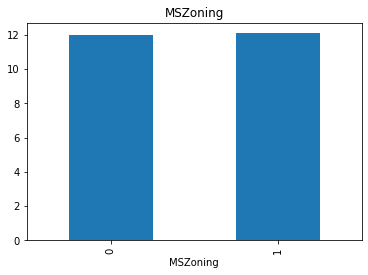

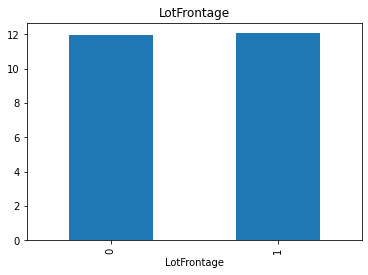

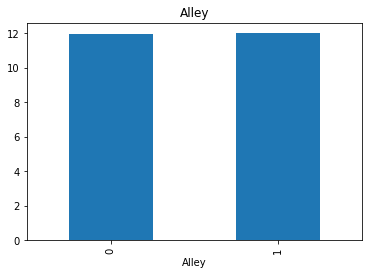

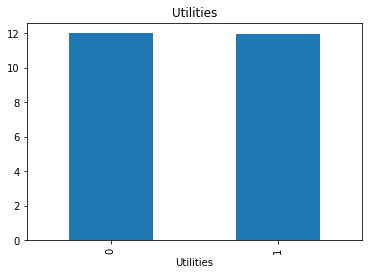

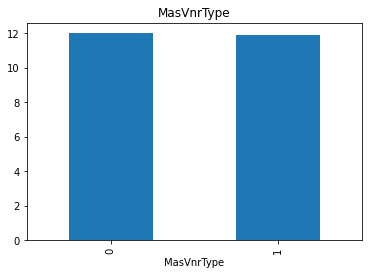

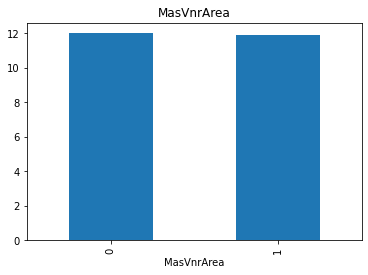

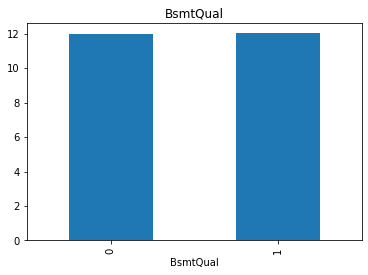

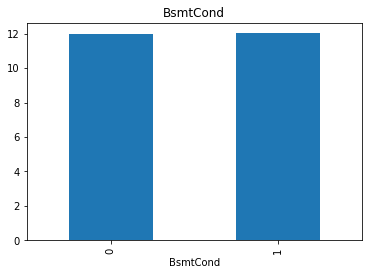

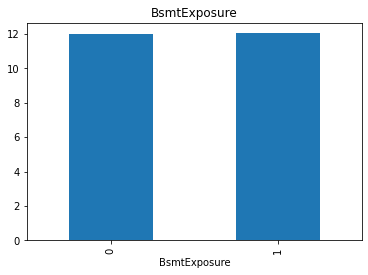

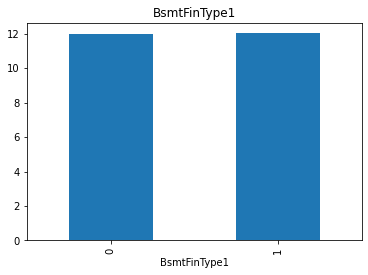

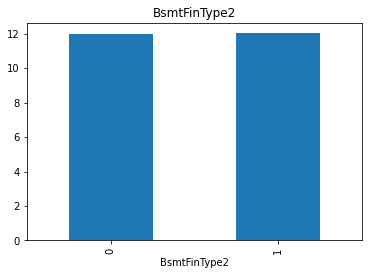

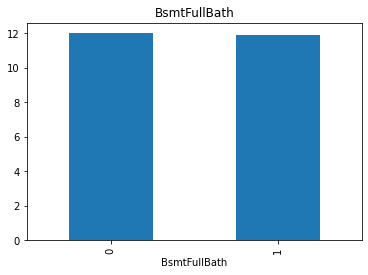

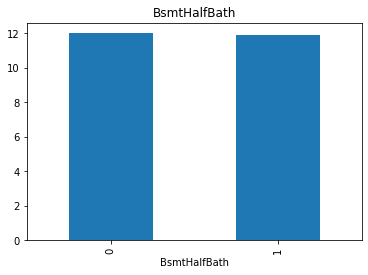

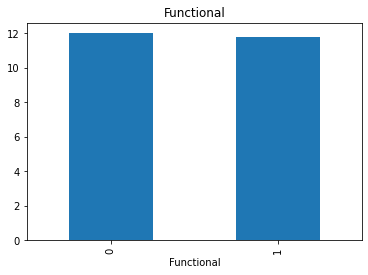

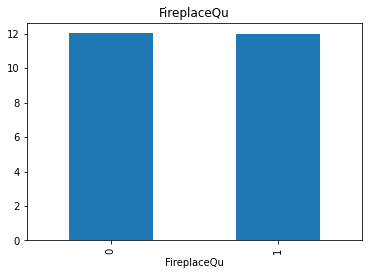

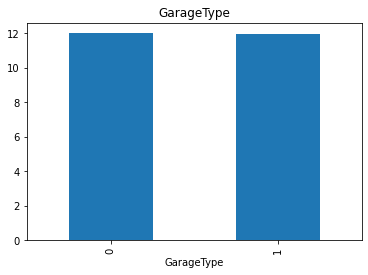

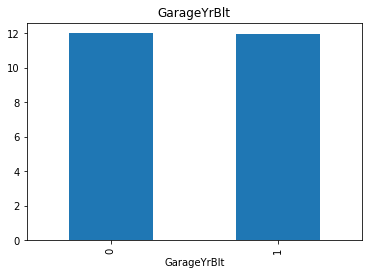

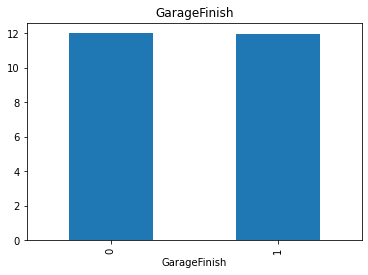

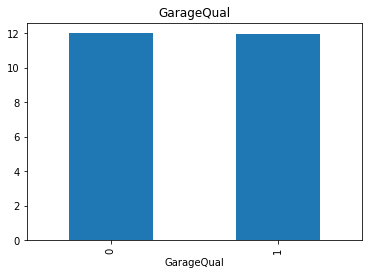

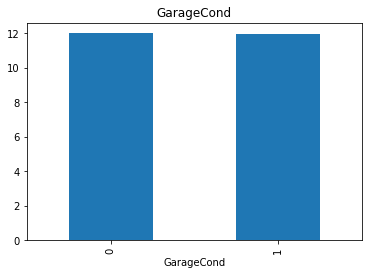

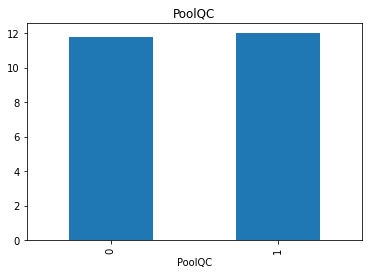

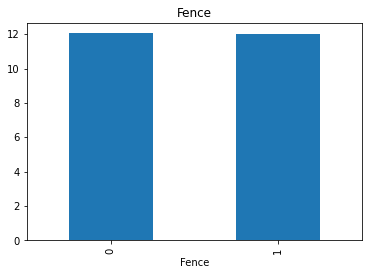

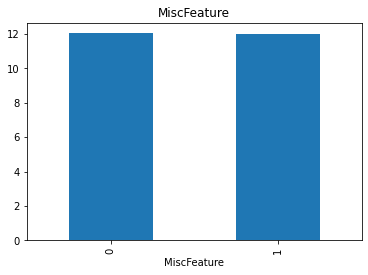

In [64]:
for feature in test_null:
  data=test.copy()
  data[feature]=np.where(data[feature].isnull(),1,0)
  data.groupby(feature)['SalePrice'].median().plot(kind='bar')
  plt.title(feature)
  plt.xlabel(feature)
  
  plt.show()

In [65]:
test_cat=[feature for feature in test.columns if test[feature].dtypes=='O']
for feature in test_cat:
  print('{}: {} are categories'.format(feature,len(test[feature].unique())))

MSZoning: 6 are categories
Street: 2 are categories
Alley: 3 are categories
LotShape: 4 are categories
LandContour: 4 are categories
Utilities: 2 are categories
LotConfig: 5 are categories
LandSlope: 3 are categories
Neighborhood: 25 are categories
Condition1: 9 are categories
Condition2: 5 are categories
BldgType: 5 are categories
HouseStyle: 7 are categories
RoofStyle: 6 are categories
RoofMatl: 4 are categories
Exterior1st: 14 are categories
Exterior2nd: 16 are categories
MasVnrType: 5 are categories
ExterQual: 4 are categories
ExterCond: 5 are categories
Foundation: 6 are categories
BsmtQual: 5 are categories
BsmtCond: 5 are categories
BsmtExposure: 5 are categories
BsmtFinType1: 7 are categories
BsmtFinType2: 7 are categories
Heating: 4 are categories
HeatingQC: 5 are categories
CentralAir: 2 are categories
Electrical: 4 are categories
KitchenQual: 5 are categories
Functional: 8 are categories
FireplaceQu: 6 are categories
GarageType: 7 are categories
GarageFinish: 4 are categorie

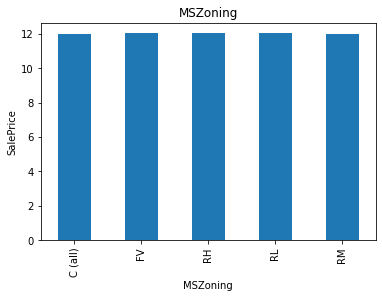

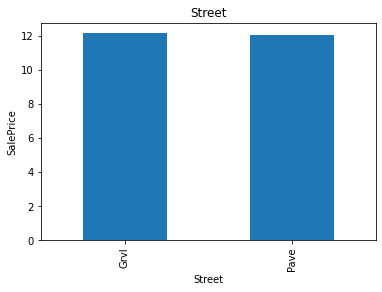

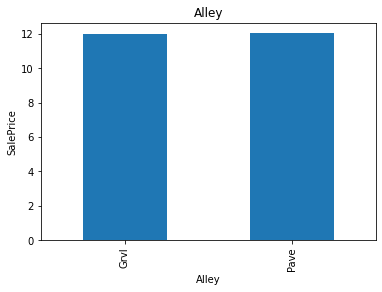

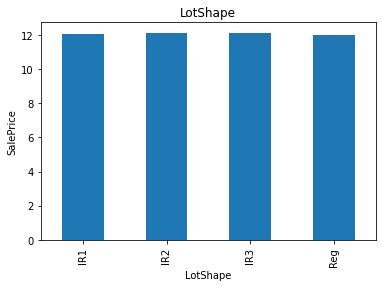

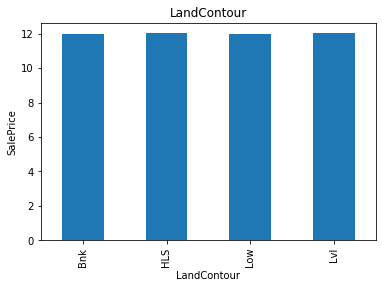

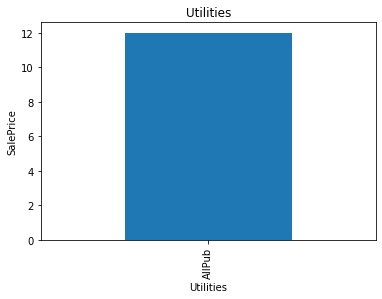

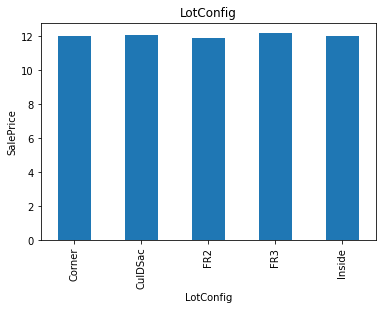

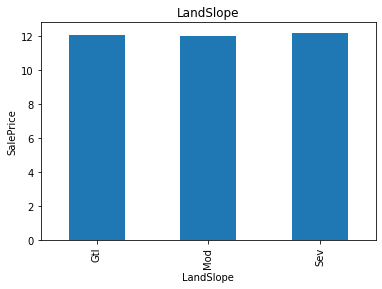

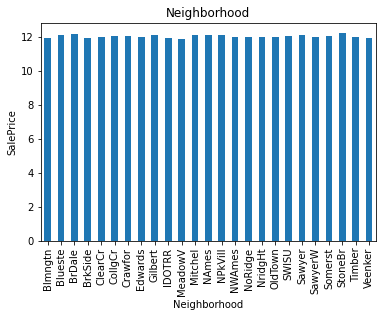

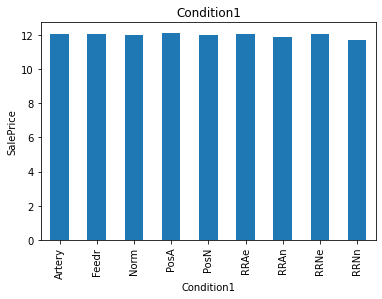

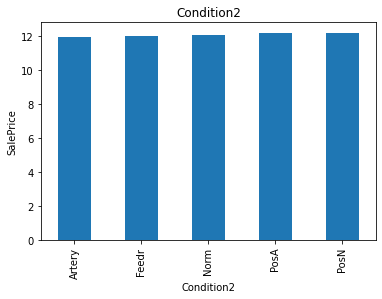

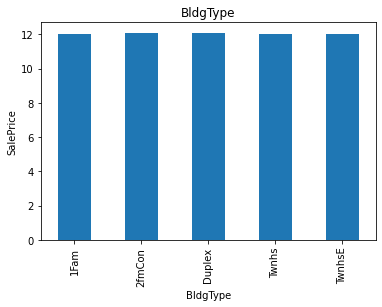

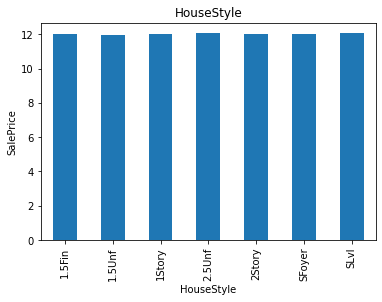

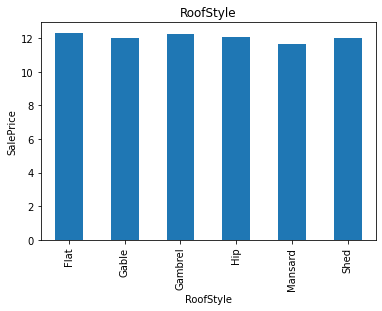

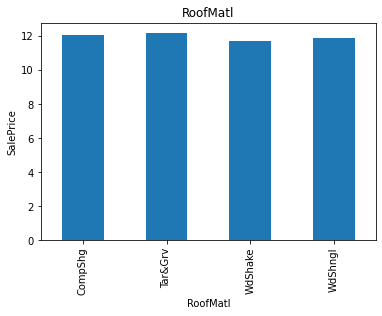

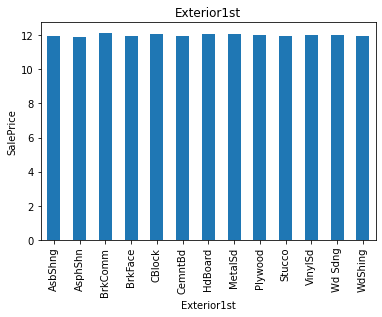

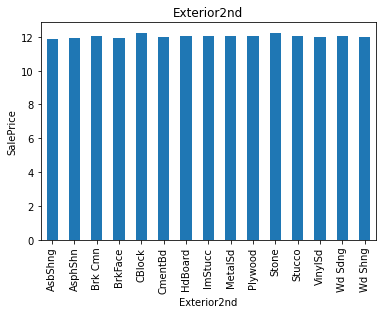

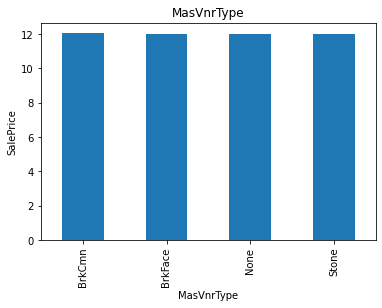

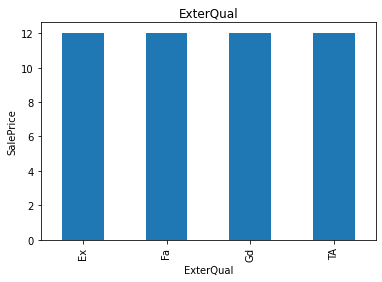

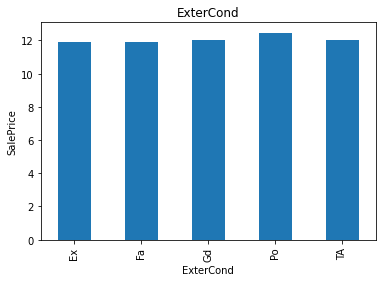

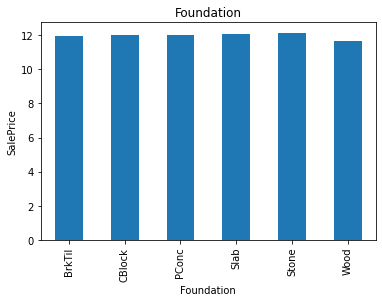

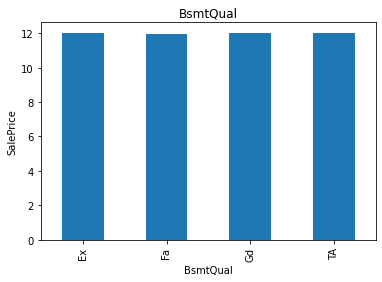

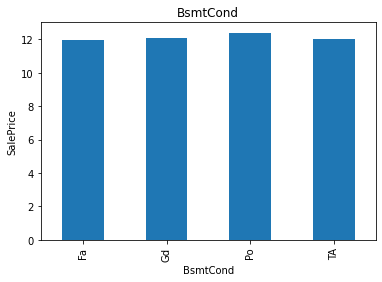

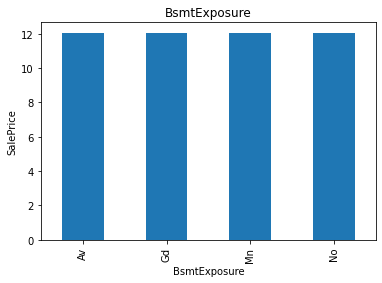

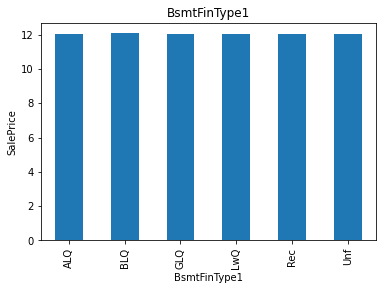

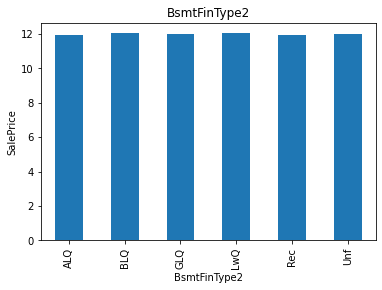

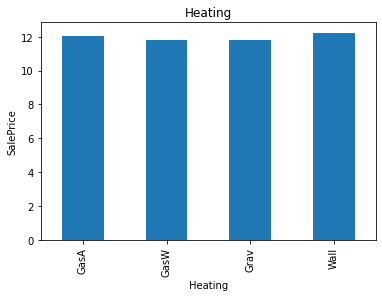

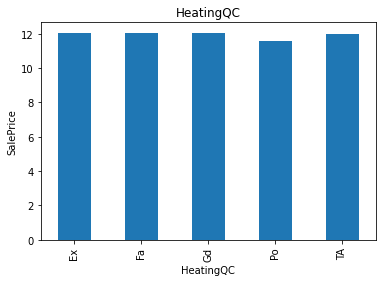

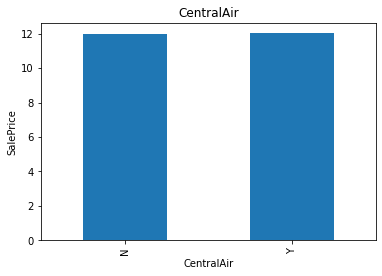

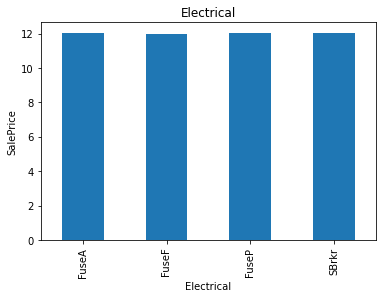

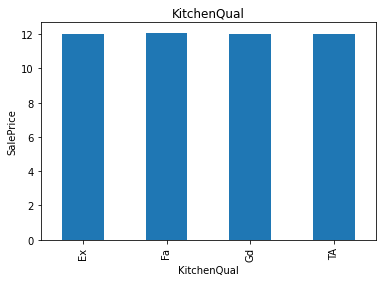

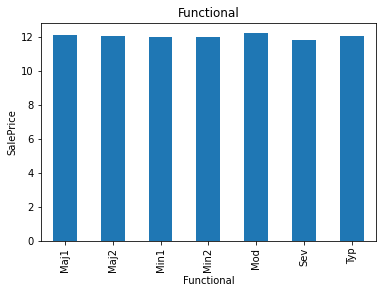

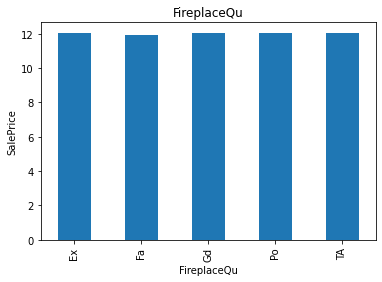

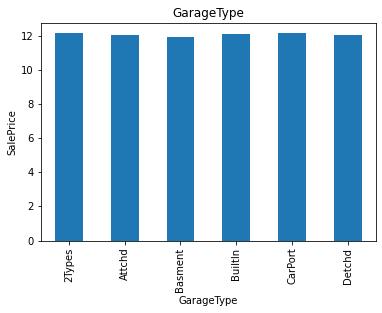

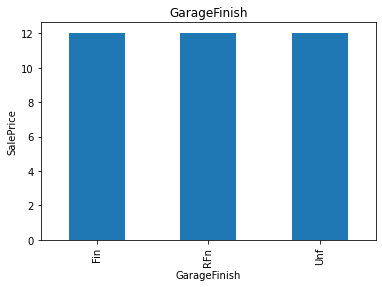

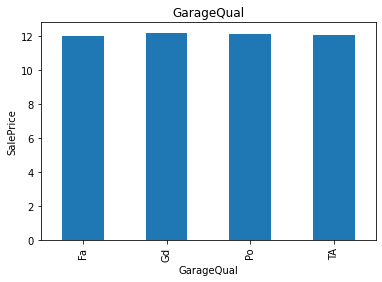

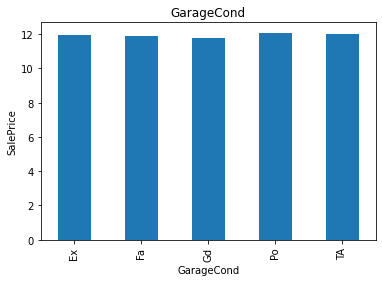

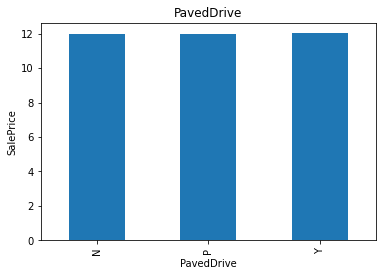

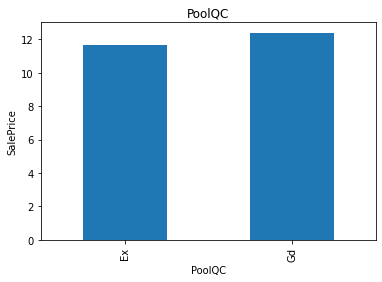

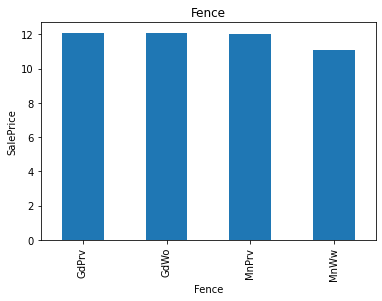

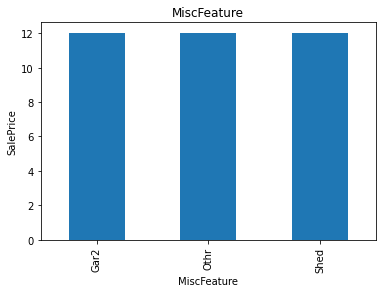

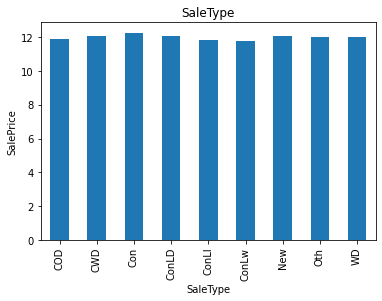

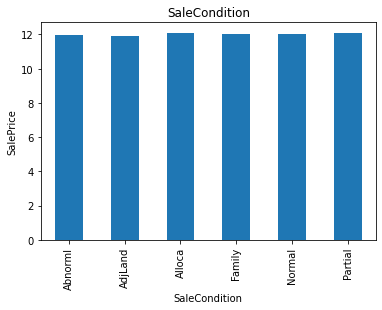

In [66]:
for feature in test_cat:
  data=test.copy()
  data.groupby(feature)['SalePrice'].mean().plot(kind='bar')
  plt.title(feature)
  plt.xlabel(feature)
  plt.ylabel('SalePrice')
  plt.show()

In [67]:
def rem_cat_test(test,test_cat):
  data=test.copy()
  data[test_cat]=data[test_cat].fillna('Missing')
  return data

In [68]:
test=rem_cat_test(test,test_cat)

In [69]:
test[test_cat].head()

,MSZoning,Street,Alley,LotShape,LandContour,Utilities,LotConfig,LandSlope,Neighborhood,Condition1,Condition2,BldgType,HouseStyle,RoofStyle,RoofMatl,Exterior1st,Exterior2nd,MasVnrType,ExterQual,ExterCond,Foundation,BsmtQual,BsmtCond,BsmtExposure,BsmtFinType1,BsmtFinType2,Heating,HeatingQC,CentralAir,Electrical,KitchenQual,Functional,FireplaceQu,GarageType,GarageFinish,GarageQual,GarageCond,PavedDrive,PoolQC,Fence,MiscFeature,SaleType,SaleCondition
0,RH,Pave,Missing,Reg,Lvl,AllPub,Inside,Gtl,NAmes,Feedr,Norm,1Fam,1Story,Gable,CompShg,VinylSd,VinylSd,None,TA,TA,CBlock,TA,TA,No,Rec,LwQ,GasA,TA,Y,SBrkr,TA,Typ,Missing,Attchd,Unf,TA,TA,Y,Missing,MnPrv,Missing,WD,Normal
1,RL,Pave,Missing,IR1,Lvl,AllPub,Corner,Gtl,NAmes,Norm,Norm,1Fam,1Story,Hip,CompShg,Wd Sdng,Wd Sdng,BrkFace,TA,TA,CBlock,TA,TA,No,ALQ,Unf,GasA,TA,Y,SBrkr,Gd,Typ,Missing,Attchd,Unf,TA,TA,Y,Missing,Missing,Gar2,WD,Normal
2,RL,Pave,Missing,IR1,Lvl,AllPub,Inside,Gtl,Gilbert,Norm,Norm,1Fam,2Story,Gable,CompShg,VinylSd,VinylSd,None,TA,TA,PConc,Gd,TA,No,GLQ,Unf,GasA,Gd,Y,SBrkr,TA,Typ,TA,Attchd,Fin,TA,TA,Y,Missing,MnPrv,Missing,WD,Normal
3,RL,Pave,Missing,IR1,Lvl,AllPub,Inside,Gtl,Gilbert,Norm,Norm,1Fam,2Story,Gable,CompShg,VinylSd,VinylSd,BrkFace,TA,TA,PConc,TA,TA,No,GLQ,Unf,GasA,Ex,Y,SBrkr,Gd,Typ,Gd,Attchd,Fin,TA,TA,Y,Missing,Missing,Missing,WD,Normal
4,RL,Pave,Missing,IR1,HLS,AllPub,Inside,Gtl,StoneBr,Norm,Norm,TwnhsE,1Story,Gable,CompShg,HdBoard,HdBoard,None,Gd,TA,PConc,Gd,TA,No,ALQ,Unf,GasA,Ex,Y,SBrkr,Gd,Typ,Missing,Attchd,RFn,TA,TA,Y,Missing,Missing,Missing,WD,Normal


In [70]:
test_num=[feature for feature in test.columns if test[feature].dtypes!='O']
for feature in test_num:
  print('{}:{}% missing values'.format(feature,np.round(test[feature].isnull().mean(),3)))

Id:0.0% missing values
MSSubClass:0.0% missing values
LotFrontage:0.156% missing values
LotArea:0.0% missing values
OverallQual:0.0% missing values
OverallCond:0.0% missing values
YearBuilt:0.0% missing values
YearRemodAdd:0.0% missing values
MasVnrArea:0.01% missing values
BsmtFinSF1:0.001% missing values
BsmtFinSF2:0.001% missing values
BsmtUnfSF:0.001% missing values
TotalBsmtSF:0.001% missing values
1stFlrSF:0.0% missing values
2ndFlrSF:0.0% missing values
LowQualFinSF:0.0% missing values
GrLivArea:0.0% missing values
BsmtFullBath:0.001% missing values
BsmtHalfBath:0.001% missing values
FullBath:0.0% missing values
HalfBath:0.0% missing values
BedroomAbvGr:0.0% missing values
KitchenAbvGr:0.0% missing values
TotRmsAbvGrd:0.0% missing values
Fireplaces:0.0% missing values
GarageYrBlt:0.053% missing values
GarageCars:0.001% missing values
GarageArea:0.001% missing values
WoodDeckSF:0.0% missing values
OpenPorchSF:0.0% missing values
EnclosedPorch:0.0% missing values
3SsnPorch:0.0% mi

In [71]:
test_yr=[feature for feature in test_num if 'Yr' in feature or 'Year' in feature]

In [72]:
test_yr

['YearBuilt', 'YearRemodAdd', 'GarageYrBlt', 'YrSold']

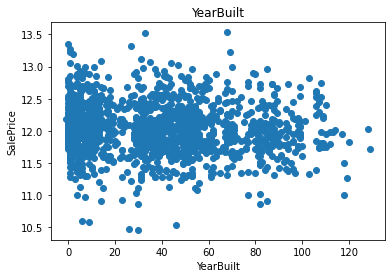

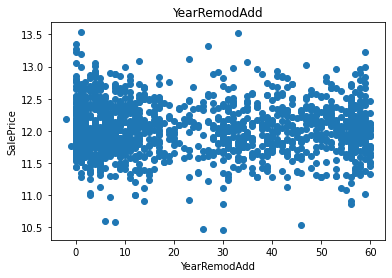

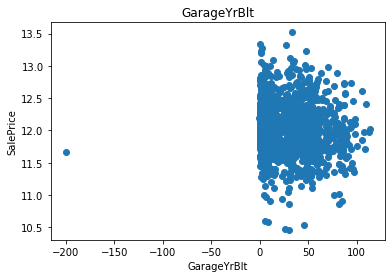

In [73]:
for feature in ['YearBuilt', 'YearRemodAdd', 'GarageYrBlt']:
  if feature!='YrSold':
    data=test.copy()
    data[feature]=data['YrSold']-data[feature]
    plt.scatter(data[feature],data['SalePrice'])
    plt.title(feature)
    plt.xlabel(feature)
    plt.ylabel('SalePrice')
    plt.show()

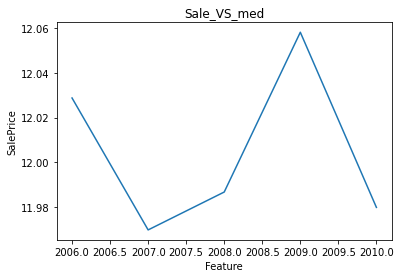

In [74]:
test.groupby('YrSold')['SalePrice'].median().plot()
plt.xlabel('Feature')
plt.ylabel('SalePrice')
plt.title('Sale_VS_med')
plt.show()

In [75]:
dis_feat_test=[feature for feature in test_num if len(test[feature].unique())<25 and feature not in test_yr+['Id']]

In [76]:
test[dis_feat_test].head()

,MSSubClass,OverallQual,OverallCond,LowQualFinSF,BsmtFullBath,BsmtHalfBath,FullBath,HalfBath,BedroomAbvGr,KitchenAbvGr,TotRmsAbvGrd,Fireplaces,GarageCars,3SsnPorch,PoolArea,MoSold
0,20,5,6,0,0.0,0.0,1,0,2,1,5,0,1.0,0,0,6
1,20,6,6,0,0.0,0.0,1,1,3,1,6,0,1.0,0,0,6
2,60,5,5,0,0.0,0.0,2,1,3,1,6,1,2.0,0,0,3
3,60,6,6,0,0.0,0.0,2,1,3,1,7,1,2.0,0,0,6
4,120,8,5,0,0.0,0.0,2,0,2,1,5,0,2.0,0,0,1


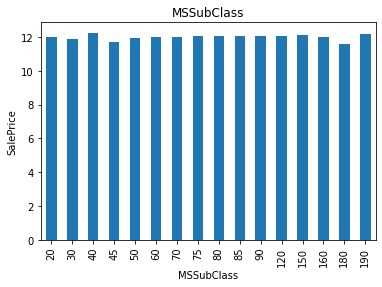

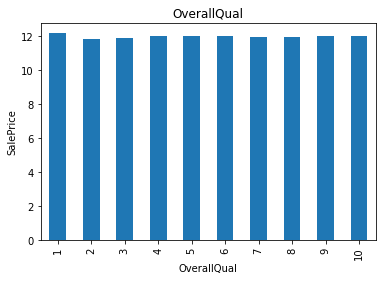

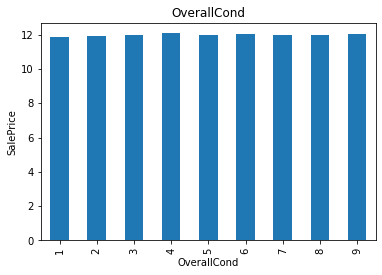

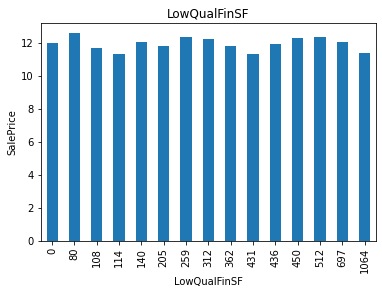

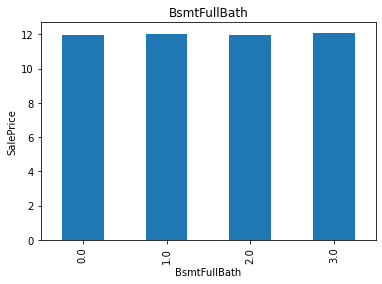

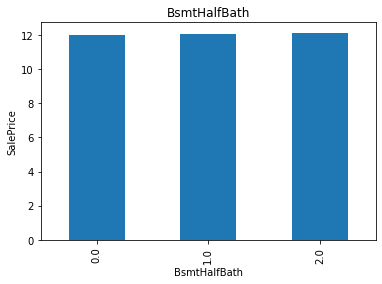

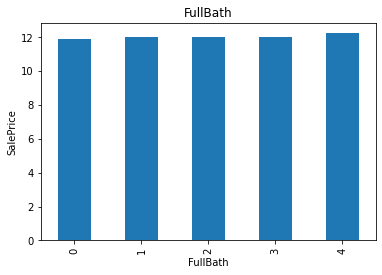

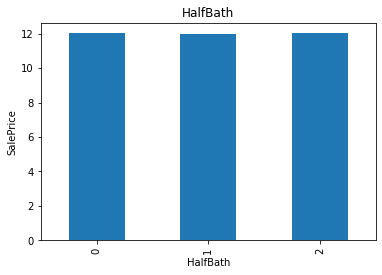

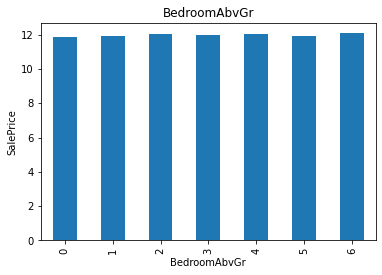

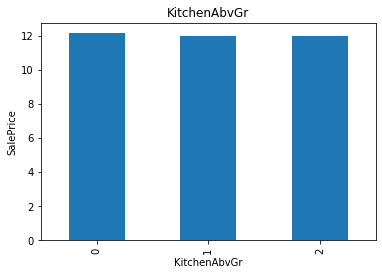

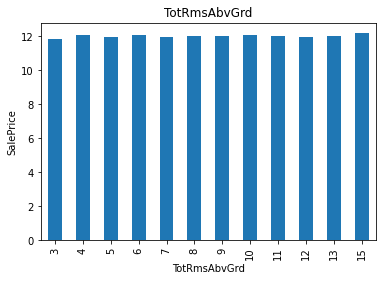

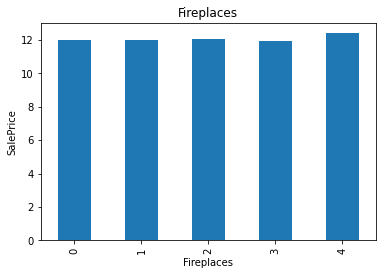

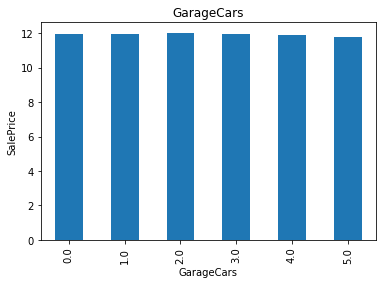

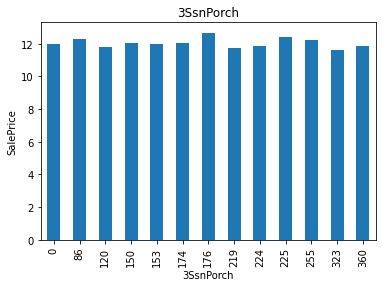

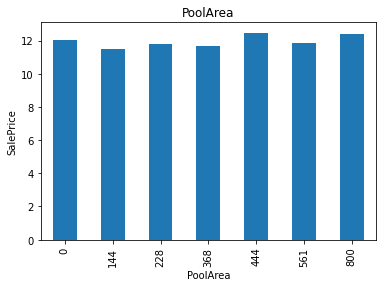

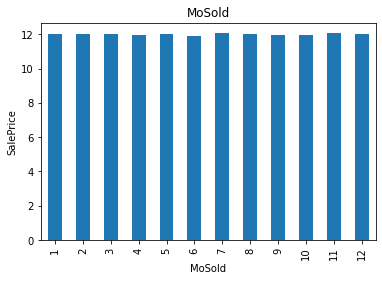

In [77]:
for feature in dis_feat_test:
  data=test.copy()
  data.groupby(feature)['SalePrice'].median().plot(kind='bar')
  plt.xlabel(feature)
  plt.ylabel('SalePrice')
  plt.title(feature)
  plt.show()

In [78]:
con_num_test=[feature for feature in test_num if feature not in dis_feat_test+test_yr+['Id']]

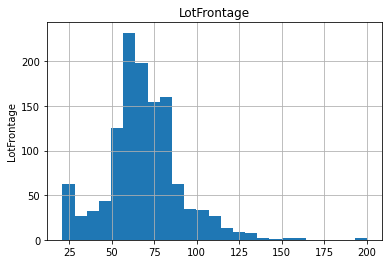

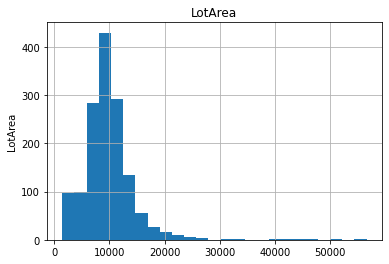

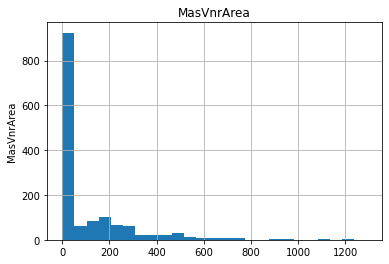

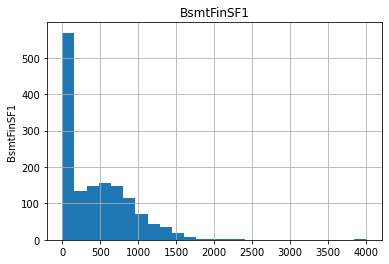

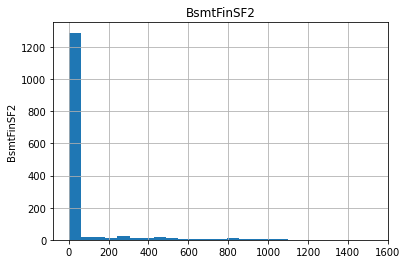

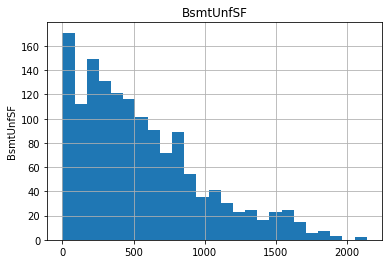

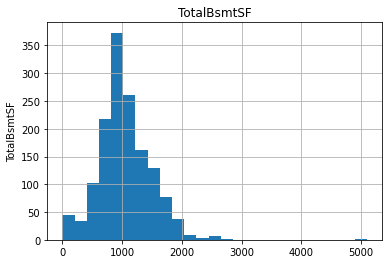

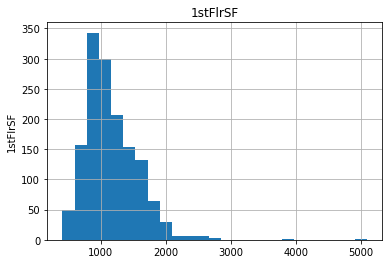

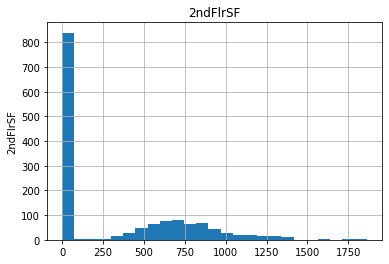

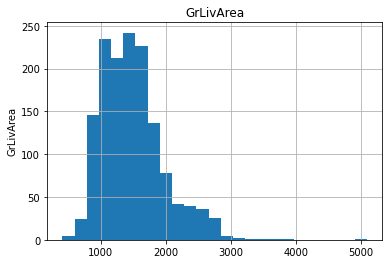

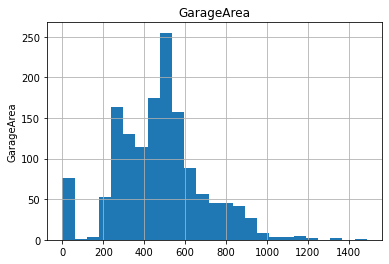

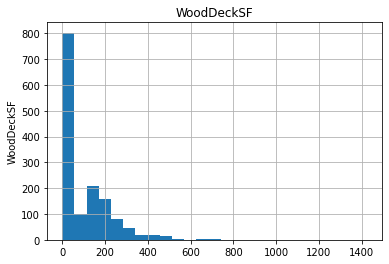

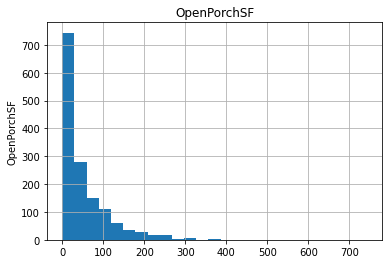

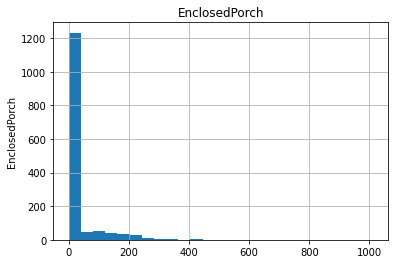

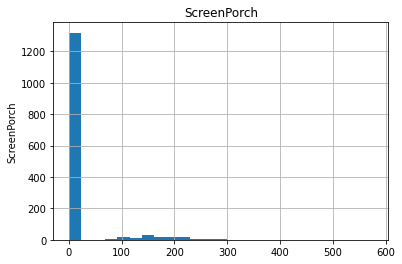

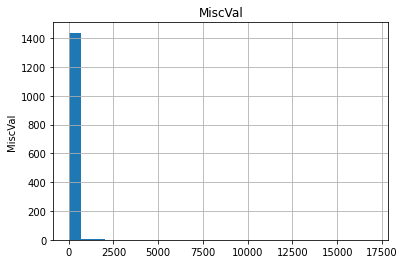

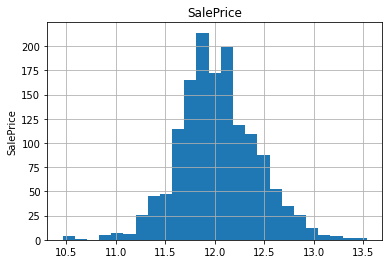

In [79]:
for feature in con_num_test:
  data=test.copy()
  data[feature].hist(bins=25)
  plt.ylabel(feature)
  plt.title(feature)
  plt.show()

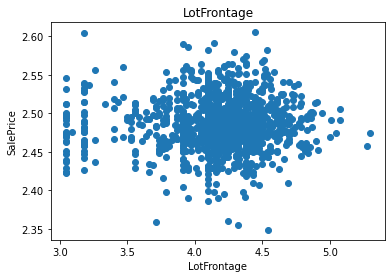

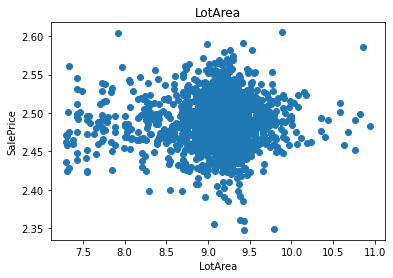

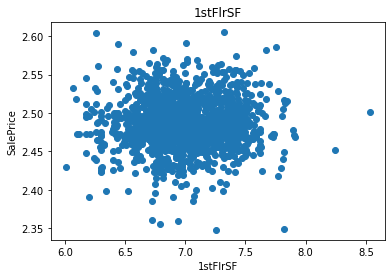

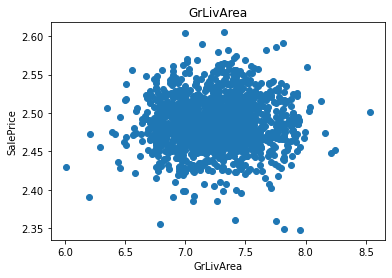

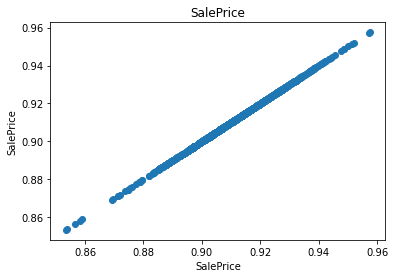

In [80]:
for feature in con_num_test:
  data=test.copy()
  if 0 in test[feature].unique():
    pass
  else:
    data[feature]=np.log(data[feature])
    data['SalePrice']=np.log(data['SalePrice'])
    plt.scatter(data[feature],data['SalePrice'])
    plt.xlabel(feature)
    plt.ylabel('SalePrice')
    plt.title(feature)
    plt.show()

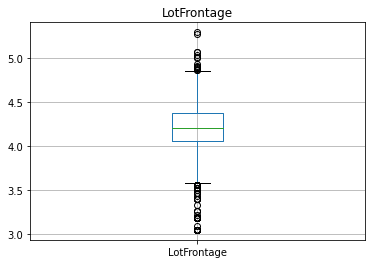

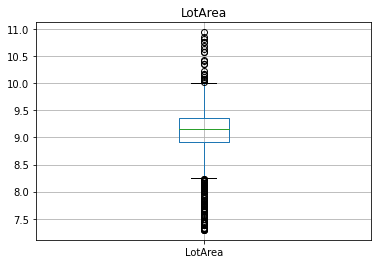

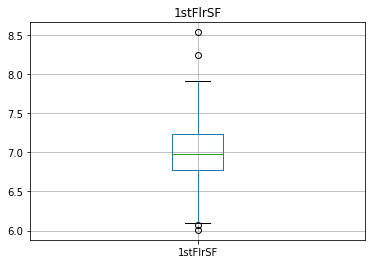

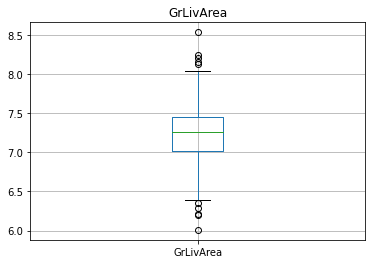

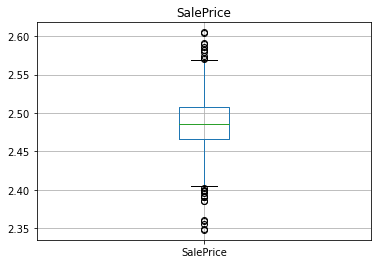

In [81]:
for feature in con_num_test:
  data=test.copy()
  if 0 in test[feature].unique():
    pass
  else:
    data[feature]=np.log(data[feature])
    data.boxplot(column=feature)
    plt.title(feature)
    plt.show()


In [82]:
test_num_nan=[feature for feature in test.columns if test[feature].isnull().mean()>1 and test[feature].dtypes!='O']

In [83]:
for feature in test_num_nan:
  median=test[feature].median()
  test[feature].fillna(median,inplace=True)

In [84]:
test[test_num_nan].isnull().values.any()

False

In [85]:
test.head()

,Id,MSSubClass,MSZoning,LotFrontage,LotArea,Street,Alley,LotShape,LandContour,Utilities,LotConfig,LandSlope,Neighborhood,Condition1,Condition2,BldgType,HouseStyle,OverallQual,OverallCond,YearBuilt,YearRemodAdd,RoofStyle,RoofMatl,Exterior1st,Exterior2nd,MasVnrType,MasVnrArea,ExterQual,ExterCond,Foundation,BsmtQual,BsmtCond,BsmtExposure,BsmtFinType1,BsmtFinSF1,BsmtFinType2,BsmtFinSF2,BsmtUnfSF,TotalBsmtSF,Heating,...,CentralAir,Electrical,1stFlrSF,2ndFlrSF,LowQualFinSF,GrLivArea,BsmtFullBath,BsmtHalfBath,FullBath,HalfBath,BedroomAbvGr,KitchenAbvGr,KitchenQual,TotRmsAbvGrd,Functional,Fireplaces,FireplaceQu,GarageType,GarageYrBlt,GarageFinish,GarageCars,GarageArea,GarageQual,GarageCond,PavedDrive,WoodDeckSF,OpenPorchSF,EnclosedPorch,3SsnPorch,ScreenPorch,PoolArea,PoolQC,Fence,MiscFeature,MiscVal,MoSold,YrSold,SaleType,SaleCondition,SalePrice
0,1461,20,RH,80.0,11622,Pave,Missing,Reg,Lvl,AllPub,Inside,Gtl,NAmes,Feedr,Norm,1Fam,1Story,5,6,1961,1961,Gable,CompShg,VinylSd,VinylSd,None,0.0,TA,TA,CBlock,TA,TA,No,Rec,468.0,LwQ,144.0,270.0,882.0,GasA,...,Y,SBrkr,896,0,0,896,0.0,0.0,1,0,2,1,TA,5,Typ,0,Missing,Attchd,1961.0,Unf,1.0,730.0,TA,TA,Y,140,0,0,0,120,0,Missing,MnPrv,Missing,0,6,2010,WD,Normal,12.247694
1,1462,20,RL,81.0,14267,Pave,Missing,IR1,Lvl,AllPub,Corner,Gtl,NAmes,Norm,Norm,1Fam,1Story,6,6,1958,1958,Hip,CompShg,Wd Sdng,Wd Sdng,BrkFace,108.0,TA,TA,CBlock,TA,TA,No,ALQ,923.0,Unf,0.0,406.0,1329.0,GasA,...,Y,SBrkr,1329,0,0,1329,0.0,0.0,1,1,3,1,Gd,6,Typ,0,Missing,Attchd,1958.0,Unf,1.0,312.0,TA,TA,Y,393,36,0,0,0,0,Missing,Missing,Gar2,12500,6,2010,WD,Normal,12.109011
2,1463,60,RL,74.0,13830,Pave,Missing,IR1,Lvl,AllPub,Inside,Gtl,Gilbert,Norm,Norm,1Fam,2Story,5,5,1997,1998,Gable,CompShg,VinylSd,VinylSd,None,0.0,TA,TA,PConc,Gd,TA,No,GLQ,791.0,Unf,0.0,137.0,928.0,GasA,...,Y,SBrkr,928,701,0,1629,0.0,0.0,2,1,3,1,TA,6,Typ,1,TA,Attchd,1997.0,Fin,2.0,482.0,TA,TA,Y,212,34,0,0,0,0,Missing,MnPrv,Missing,0,3,2010,WD,Normal,12.317167
3,1464,60,RL,78.0,9978,Pave,Missing,IR1,Lvl,AllPub,Inside,Gtl,Gilbert,Norm,Norm,1Fam,2Story,6,6,1998,1998,Gable,CompShg,VinylSd,VinylSd,BrkFace,20.0,TA,TA,PConc,TA,TA,No,GLQ,602.0,Unf,0.0,324.0,926.0,GasA,...,Y,SBrkr,926,678,0,1604,0.0,0.0,2,1,3,1,Gd,7,Typ,1,Gd,Attchd,1998.0,Fin,2.0,470.0,TA,TA,Y,360,36,0,0,0,0,Missing,Missing,Missing,0,6,2010,WD,Normal,11.849398
4,1465,120,RL,43.0,5005,Pave,Missing,IR1,HLS,AllPub,Inside,Gtl,StoneBr,Norm,Norm,TwnhsE,1Story,8,5,1992,1992,Gable,CompShg,HdBoard,HdBoard,None,0.0,Gd,TA,PConc,Gd,TA,No,ALQ,263.0,Unf,0.0,1017.0,1280.0,GasA,...,Y,SBrkr,1280,0,0,1280,0.0,0.0,2,0,2,1,Gd,5,Typ,0,Missing,Attchd,1992.0,RFn,2.0,506.0,TA,TA,Y,0,82,0,0,144,0,Missing,Missing,Missing,0,1,2010,WD,Normal,12.429216


In [86]:
test_yr

['YearBuilt', 'YearRemodAdd', 'GarageYrBlt', 'YrSold']

In [87]:
for feature in ['YearBuilt', 'YearRemodAdd', 'GarageYrBlt']:
  test[feature]=test['YrSold']-test[feature]

In [88]:
test[['YearBuilt', 'YearRemodAdd', 'GarageYrBlt']].head()

,YearBuilt,YearRemodAdd,GarageYrBlt
0,49,49,49.0
1,52,52,52.0
2,13,12,13.0
3,12,12,12.0
4,18,18,18.0


In [89]:
num_feat=['LotFrontage', 'LotArea', '1stFlrSF', 'GrLivArea', 'SalePrice']
for feature in num_feat:
  test[feature]=np.log(test[feature])


In [90]:
for feature in test_cat:
  temp=test.groupby(feature)['SalePrice'].count()/len(test)
  temp_test=temp[temp>0.01].index
  test[feature]=np.where(test[feature].isin(temp_df),test[feature],'Rare_var')

In [91]:
for feature in test_cat:
  label_ord=test.groupby([feature])['SalePrice'].mean().sort_values().index
  label_ord={k:i for i,k in enumerate(label_ord,0)}
  test[feature]=test[feature].map(label_ord)

In [92]:
test.head()

,Id,MSSubClass,MSZoning,LotFrontage,LotArea,Street,Alley,LotShape,LandContour,Utilities,LotConfig,LandSlope,Neighborhood,Condition1,Condition2,BldgType,HouseStyle,OverallQual,OverallCond,YearBuilt,YearRemodAdd,RoofStyle,RoofMatl,Exterior1st,Exterior2nd,MasVnrType,MasVnrArea,ExterQual,ExterCond,Foundation,BsmtQual,BsmtCond,BsmtExposure,BsmtFinType1,BsmtFinSF1,BsmtFinType2,BsmtFinSF2,BsmtUnfSF,TotalBsmtSF,Heating,...,CentralAir,Electrical,1stFlrSF,2ndFlrSF,LowQualFinSF,GrLivArea,BsmtFullBath,BsmtHalfBath,FullBath,HalfBath,BedroomAbvGr,KitchenAbvGr,KitchenQual,TotRmsAbvGrd,Functional,Fireplaces,FireplaceQu,GarageType,GarageYrBlt,GarageFinish,GarageCars,GarageArea,GarageQual,GarageCond,PavedDrive,WoodDeckSF,OpenPorchSF,EnclosedPorch,3SsnPorch,ScreenPorch,PoolArea,PoolQC,Fence,MiscFeature,MiscVal,MoSold,YrSold,SaleType,SaleCondition,SalePrice
0,1461,20,0,4.382027,9.360655,0,0,0,0,0,0,0,0,0,0,0,0,5,6,49,49,0,0,0,0,0,0.0,0,0,0,0,0,0,0,468.0,0,144.0,270.0,882.0,0,...,0,0,6.797940,0,0,6.797940,0.0,0.0,1,0,2,1,0,5,0,0,0,0,49.0,0,1.0,730.0,0,0,0,140,0,0,0,120,0,0,0,0,0,6,2010,0,2,2.505338
1,1462,20,0,4.394449,9.565704,0,0,0,0,0,0,0,0,0,0,0,0,6,6,52,52,0,0,0,0,0,108.0,0,0,0,0,0,0,0,923.0,0,0.0,406.0,1329.0,0,...,0,0,7.192182,0,0,7.192182,0.0,0.0,1,1,3,1,0,6,0,0,0,0,52.0,0,1.0,312.0,0,0,0,393,36,0,0,0,0,0,0,0,12500,6,2010,0,2,2.493950
2,1463,60,0,4.304065,9.534595,0,0,0,0,0,0,0,0,0,0,0,0,5,5,13,12,0,0,0,0,0,0.0,0,0,0,0,0,0,0,791.0,0,0.0,137.0,928.0,0,...,0,0,6.833032,701,0,7.395722,0.0,0.0,2,1,3,1,0,6,0,1,0,0,13.0,0,2.0,482.0,0,0,0,212,34,0,0,0,0,0,0,0,0,3,2010,0,2,2.510994
3,1464,60,0,4.356709,9.208138,0,0,0,0,0,0,0,0,0,0,0,0,6,6,12,12,0,0,0,0,0,20.0,0,0,0,0,0,0,0,602.0,0,0.0,324.0,926.0,0,...,0,0,6.830874,678,0,7.380256,0.0,0.0,2,1,3,1,0,7,0,1,0,0,12.0,0,2.0,470.0,0,0,0,360,36,0,0,0,0,0,0,0,0,6,2010,0,2,2.472277
4,1465,120,0,3.761200,8.518193,0,0,0,0,0,0,0,0,0,0,0,0,8,5,18,18,0,0,0,0,0,0.0,0,0,0,0,0,0,0,263.0,0,0.0,1017.0,1280.0,0,...,0,0,7.154615,0,0,7.154615,0.0,0.0,2,0,2,1,0,5,0,0,0,0,18.0,0,2.0,506.0,0,0,0,0,82,0,0,144,0,0,0,0,0,1,2010,0,2,2.520050


In [93]:
test_scaling=[feature for feature in test.columns if feature not in ['Id','SalePrice']]

In [94]:
scaler=MinMaxScaler()

In [95]:
scaler.fit_transform(test[test_scaling])

array([[0.        , 0.        , 0.59344538, ..., 1.        , 0.        ,
        0.5       ],
       [0.        , 0.        , 0.59895721, ..., 1.        , 0.        ,
        0.5       ],
       [0.23529412, 0.        , 0.55885415, ..., 1.        , 0.        ,
        0.5       ],
       ...,
       [0.        , 0.        , 0.90099208, ..., 0.        , 0.        ,
        0.        ],
       [0.38235294, 0.        , 0.48035069, ..., 0.        , 0.        ,
        0.5       ],
       [0.23529412, 0.        , 0.55885415, ..., 0.        , 0.        ,
        0.5       ]])

In [96]:
test[test_scaling].isnull().sum()

MSSubClass         0
MSZoning           0
LotFrontage      227
LotArea            0
Street             0
                ... 
MiscVal            0
MoSold             0
YrSold             0
SaleType           0
SaleCondition      0
Length: 79, dtype: int64

In [97]:
test[test_scaling].head()

,MSSubClass,MSZoning,LotFrontage,LotArea,Street,Alley,LotShape,LandContour,Utilities,LotConfig,LandSlope,Neighborhood,Condition1,Condition2,BldgType,HouseStyle,OverallQual,OverallCond,YearBuilt,YearRemodAdd,RoofStyle,RoofMatl,Exterior1st,Exterior2nd,MasVnrType,MasVnrArea,ExterQual,ExterCond,Foundation,BsmtQual,BsmtCond,BsmtExposure,BsmtFinType1,BsmtFinSF1,BsmtFinType2,BsmtFinSF2,BsmtUnfSF,TotalBsmtSF,Heating,HeatingQC,CentralAir,Electrical,1stFlrSF,2ndFlrSF,LowQualFinSF,GrLivArea,BsmtFullBath,BsmtHalfBath,FullBath,HalfBath,BedroomAbvGr,KitchenAbvGr,KitchenQual,TotRmsAbvGrd,Functional,Fireplaces,FireplaceQu,GarageType,GarageYrBlt,GarageFinish,GarageCars,GarageArea,GarageQual,GarageCond,PavedDrive,WoodDeckSF,OpenPorchSF,EnclosedPorch,3SsnPorch,ScreenPorch,PoolArea,PoolQC,Fence,MiscFeature,MiscVal,MoSold,YrSold,SaleType,SaleCondition
0,20,0,4.382027,9.360655,0,0,0,0,0,0,0,0,0,0,0,0,5,6,49,49,0,0,0,0,0,0.0,0,0,0,0,0,0,0,468.0,0,144.0,270.0,882.0,0,0,0,0,6.797940,0,0,6.797940,0.0,0.0,1,0,2,1,0,5,0,0,0,0,49.0,0,1.0,730.0,0,0,0,140,0,0,0,120,0,0,0,0,0,6,2010,0,2
1,20,0,4.394449,9.565704,0,0,0,0,0,0,0,0,0,0,0,0,6,6,52,52,0,0,0,0,0,108.0,0,0,0,0,0,0,0,923.0,0,0.0,406.0,1329.0,0,0,0,0,7.192182,0,0,7.192182,0.0,0.0,1,1,3,1,0,6,0,0,0,0,52.0,0,1.0,312.0,0,0,0,393,36,0,0,0,0,0,0,0,12500,6,2010,0,2
2,60,0,4.304065,9.534595,0,0,0,0,0,0,0,0,0,0,0,0,5,5,13,12,0,0,0,0,0,0.0,0,0,0,0,0,0,0,791.0,0,0.0,137.0,928.0,0,0,0,0,6.833032,701,0,7.395722,0.0,0.0,2,1,3,1,0,6,0,1,0,0,13.0,0,2.0,482.0,0,0,0,212,34,0,0,0,0,0,0,0,0,3,2010,0,2
3,60,0,4.356709,9.208138,0,0,0,0,0,0,0,0,0,0,0,0,6,6,12,12,0,0,0,0,0,20.0,0,0,0,0,0,0,0,602.0,0,0.0,324.0,926.0,0,0,0,0,6.830874,678,0,7.380256,0.0,0.0,2,1,3,1,0,7,0,1,0,0,12.0,0,2.0,470.0,0,0,0,360,36,0,0,0,0,0,0,0,0,6,2010,0,2
4,120,0,3.761200,8.518193,0,0,0,0,0,0,0,0,0,0,0,0,8,5,18,18,0,0,0,0,0,0.0,0,0,0,0,0,0,0,263.0,0,0.0,1017.0,1280.0,0,0,0,0,7.154615,0,0,7.154615,0.0,0.0,2,0,2,1,0,5,0,0,0,0,18.0,0,2.0,506.0,0,0,0,0,82,0,0,144,0,0,0,0,0,1,2010,0,2


In [98]:
for feature in test:
  median=test[feature].median()
  test[feature].fillna(median,inplace=True)

In [99]:
test.head()

,Id,MSSubClass,MSZoning,LotFrontage,LotArea,Street,Alley,LotShape,LandContour,Utilities,LotConfig,LandSlope,Neighborhood,Condition1,Condition2,BldgType,HouseStyle,OverallQual,OverallCond,YearBuilt,YearRemodAdd,RoofStyle,RoofMatl,Exterior1st,Exterior2nd,MasVnrType,MasVnrArea,ExterQual,ExterCond,Foundation,BsmtQual,BsmtCond,BsmtExposure,BsmtFinType1,BsmtFinSF1,BsmtFinType2,BsmtFinSF2,BsmtUnfSF,TotalBsmtSF,Heating,...,CentralAir,Electrical,1stFlrSF,2ndFlrSF,LowQualFinSF,GrLivArea,BsmtFullBath,BsmtHalfBath,FullBath,HalfBath,BedroomAbvGr,KitchenAbvGr,KitchenQual,TotRmsAbvGrd,Functional,Fireplaces,FireplaceQu,GarageType,GarageYrBlt,GarageFinish,GarageCars,GarageArea,GarageQual,GarageCond,PavedDrive,WoodDeckSF,OpenPorchSF,EnclosedPorch,3SsnPorch,ScreenPorch,PoolArea,PoolQC,Fence,MiscFeature,MiscVal,MoSold,YrSold,SaleType,SaleCondition,SalePrice
0,1461,20,0,4.382027,9.360655,0,0,0,0,0,0,0,0,0,0,0,0,5,6,49,49,0,0,0,0,0,0.0,0,0,0,0,0,0,0,468.0,0,144.0,270.0,882.0,0,...,0,0,6.797940,0,0,6.797940,0.0,0.0,1,0,2,1,0,5,0,0,0,0,49.0,0,1.0,730.0,0,0,0,140,0,0,0,120,0,0,0,0,0,6,2010,0,2,2.505338
1,1462,20,0,4.394449,9.565704,0,0,0,0,0,0,0,0,0,0,0,0,6,6,52,52,0,0,0,0,0,108.0,0,0,0,0,0,0,0,923.0,0,0.0,406.0,1329.0,0,...,0,0,7.192182,0,0,7.192182,0.0,0.0,1,1,3,1,0,6,0,0,0,0,52.0,0,1.0,312.0,0,0,0,393,36,0,0,0,0,0,0,0,12500,6,2010,0,2,2.493950
2,1463,60,0,4.304065,9.534595,0,0,0,0,0,0,0,0,0,0,0,0,5,5,13,12,0,0,0,0,0,0.0,0,0,0,0,0,0,0,791.0,0,0.0,137.0,928.0,0,...,0,0,6.833032,701,0,7.395722,0.0,0.0,2,1,3,1,0,6,0,1,0,0,13.0,0,2.0,482.0,0,0,0,212,34,0,0,0,0,0,0,0,0,3,2010,0,2,2.510994
3,1464,60,0,4.356709,9.208138,0,0,0,0,0,0,0,0,0,0,0,0,6,6,12,12,0,0,0,0,0,20.0,0,0,0,0,0,0,0,602.0,0,0.0,324.0,926.0,0,...,0,0,6.830874,678,0,7.380256,0.0,0.0,2,1,3,1,0,7,0,1,0,0,12.0,0,2.0,470.0,0,0,0,360,36,0,0,0,0,0,0,0,0,6,2010,0,2,2.472277
4,1465,120,0,3.761200,8.518193,0,0,0,0,0,0,0,0,0,0,0,0,8,5,18,18,0,0,0,0,0,0.0,0,0,0,0,0,0,0,263.0,0,0.0,1017.0,1280.0,0,...,0,0,7.154615,0,0,7.154615,0.0,0.0,2,0,2,1,0,5,0,0,0,0,18.0,0,2.0,506.0,0,0,0,0,82,0,0,144,0,0,0,0,0,1,2010,0,2,2.520050


In [100]:
test.isnull().values.any()

False

In [101]:
data=pd.concat([test[['Id','SalePrice']].reset_index(drop=True),pd.DataFrame(scaler.transform(test[test_scaling]),columns=test_scaling)],axis=1)

In [102]:
data.isnull().values.any()

False

In [156]:
X_test=data.drop(['Id','SalePrice'],axis=1)

In [157]:
y_test=data['SalePrice']

In [158]:
y_test.head()

0    2.505338
1    2.493950
2    2.510994
3    2.472277
4    2.520050
Name: SalePrice, dtype: float64

In [167]:
test_feat_sel=SelectFromModel(Lasso(alpha=0.000000001,random_state=42))

In [168]:
test_feat_sel.fit(X_test,y_test)

/usr/local/lib/python3.7/dist-packages/sklearn/linear_model/_coordinate_descent.py:476: ConvergenceWarning: Objective did not converge. You might want to increase the number of iterations. Duality gap: 0.7782026580785456, tolerance: 0.00016094222854640884
  positive)


SelectFromModel(estimator=Lasso(alpha=1e-09, copy_X=True, fit_intercept=True,
                                max_iter=1000, normalize=False, positive=False,
                                precompute=False, random_state=42,
                                selection='cyclic', tol=0.0001,
                                warm_start=False),
                max_features=None, norm_order=1, prefit=False, threshold=None)

In [169]:
test_feat_sel.get_support()

array([ True, False,  True,  True, False, False, False, False, False,
       False, False, False, False, False, False, False,  True,  True,
        True,  True, False, False, False, False, False,  True, False,
       False, False, False, False, False, False,  True, False,  True,
        True,  True, False, False, False, False,  True,  True,  True,
        True,  True,  True,  True,  True,  True,  True, False,  True,
       False,  True, False, False,  True, False,  True,  True, False,
       False, False,  True,  True,  True,  True,  True,  True, False,
       False, False,  True,  True,  True, False,  True])

In [170]:
selected_test_feat=X_test.columns[(test_feat_sel.get_support())]
print('tot feature: {}'.format(X_test.shape[1]))
print('sel_feat: {}'.format(len(selected_test_feat)))

tot feature: 79
sel_feat: 37


In [171]:
selected_test_feat

Index(['MSSubClass', 'LotFrontage', 'LotArea', 'OverallQual', 'OverallCond',
       'YearBuilt', 'YearRemodAdd', 'MasVnrArea', 'BsmtFinSF1', 'BsmtFinSF2',
       'BsmtUnfSF', 'TotalBsmtSF', '1stFlrSF', '2ndFlrSF', 'LowQualFinSF',
       'GrLivArea', 'BsmtFullBath', 'BsmtHalfBath', 'FullBath', 'HalfBath',
       'BedroomAbvGr', 'KitchenAbvGr', 'TotRmsAbvGrd', 'Fireplaces',
       'GarageYrBlt', 'GarageCars', 'GarageArea', 'WoodDeckSF', 'OpenPorchSF',
       'EnclosedPorch', '3SsnPorch', 'ScreenPorch', 'PoolArea', 'MiscVal',
       'MoSold', 'YrSold', 'SaleCondition'],
      dtype='object')

In [172]:
X_test=X_test[selected_test_feat]

In [173]:
from sklearn.ensemble import RandomForestRegressor

In [174]:
reg=RandomForestRegressor()

In [175]:
reg.fit(X_train,y_train)

RandomForestRegressor(bootstrap=True, ccp_alpha=0.0, criterion='mse',
                      max_depth=None, max_features='auto', max_leaf_nodes=None,
                      max_samples=None, min_impurity_decrease=0.0,
                      min_impurity_split=None, min_samples_leaf=1,
                      min_samples_split=2, min_weight_fraction_leaf=0.0,
                      n_estimators=100, n_jobs=None, oob_score=False,
                      random_state=None, verbose=0, warm_start=False)

In [176]:
reg.score(X_train,y_train)

0.9825914963364338

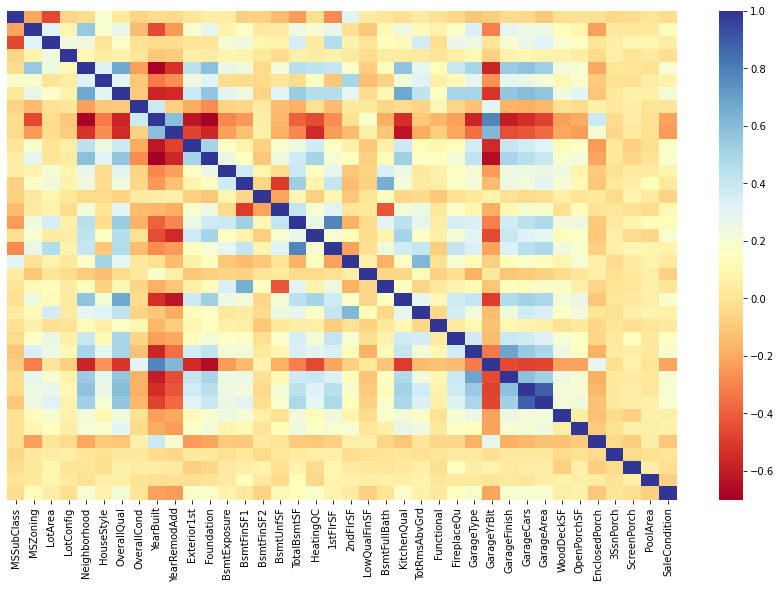

In [181]:
plt.figure(figsize=(15,9))
sns.heatmap(X_train.corr(),annot=False,cmap='RdYlBu',yticklabels=False)